<a href="https://colab.research.google.com/github/jgxuann/Prisoners-Dilemma-Data-Analysis/blob/main/prisoner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 安装包
install.packages("readxl")
install.packages("dplyr")
install.packages("ARTool")
install.packages("vegan")
install.packages("ART")
install.packages(c("emmeans", "ggplot2", "multcomp"))
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘lme4’, ‘car’, ‘plyr’, ‘emmeans’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘permute’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’




In [ ]:
# 加载 readxl 包
library(readxl)

# 路径
file_path <- "/content/prisoner_data_analysis.xlsx"

# 读取 Excel 文件
df <- read_excel(file_path)

# 显示数据的前几行
head(df)


Nickname,Age,ID,Sex,Model_type,Cooperate,Betrayal,Time,Earns,Switchs,Be_Friendly,Repair_Effort,Be_Friendly_Weighted,Repair_Effort_Weighted
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M1PH,23,M1,M,Purported Human,0.60,20,386,125,21,0.5455,0.5455,0.5190000,0.6000000
M2PH,23,M2,M,Purported Human,0.68,16,482,125,9,0.4167,0.5000,0.4143000,0.5143000
M3PH,23,M3,M,Purported Human,0.52,24,819,114,19,0.3889,0.5000,0.5179000,0.5893000
M4PH,22,M4,M,Purported Human,0.64,18,631,129,7,0.2727,0.3182,0.4579000,0.3864000
M5PH,24,M5,M,Purported Human,0.62,19,604,124,11,0.4375,0.5000,0.4111111,0.5472222
M6PH,26,M6,M,Purported Human,0.64,18,490,130,11,0.4091,0.5000,0.4733333,0.6311111


[1] "所有可能的比较组:"
[1] "比较组 1 : M_Purported Human vs M_Purported Rule-Based Agents"
[1] "比较组 2 : M_Purported Human vs M_Purported LLM Agents"
[1] "比较组 3 : M_Purported Human vs F_Purported Human"
[1] "比较组 4 : M_Purported Human vs F_Purported Rule-Based Agents"
[1] "比较组 5 : M_Purported Human vs F_Purported LLM Agents"
[1] "比较组 6 : M_Purported Rule-Based Agents vs M_Purported LLM Agents"
[1] "比较组 7 : M_Purported Rule-Based Agents vs F_Purported Human"
[1] "比较组 8 : M_Purported Rule-Based Agents vs F_Purported Rule-Based Agents"
[1] "比较组 9 : M_Purported Rule-Based Agents vs F_Purported LLM Agents"
[1] "比较组 10 : M_Purported LLM Agents vs F_Purported Human"
[1] "比较组 11 : M_Purported LLM Agents vs F_Purported Rule-Based Agents"
[1] "比较组 12 : M_Purported LLM Agents vs F_Purported LLM Agents"
[1] "比较组 13 : F_Purported Human vs F_Purported Rule-Based Agents"
[1] "比较组 14 : F_Purported Human vs F_Purported LLM Agents"
[1] "比较组 15 : F_Purported Rule-Based Agents vs F_Purported LLM Agents"
Comparing: 6 

Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”


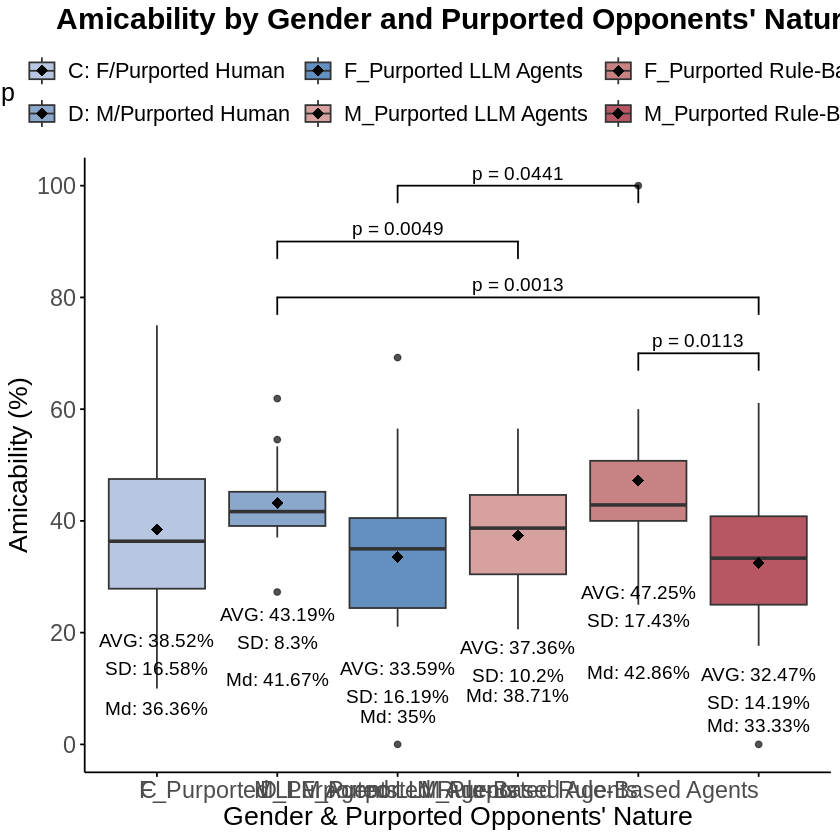

In [ ]:
# 加载必要的包
library(ggplot2)
library(ggpubr)
library(dplyr)

# 确保 dplyr::filter() 函数正确调用
df_filtered <- df %>%
  dplyr::filter(Model_type != "Human")

# 确保 Be_Friendly 列是数值型，并将其转换为百分比
df_filtered$Be_Friendly <- as.numeric(as.character(df_filtered$Be_Friendly)) * 100

# 创建分组变量
df_filtered$Group <- interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_")

# 列出所有可能的比较组
comparisons <- combn(unique(df_filtered$Group), 2, simplify = FALSE)

# 打印所有可能的比较组
print("所有可能的比较组:")
for (i in 1:length(comparisons)) {
  print(paste("比较组", i, ":", comparisons[[i]][1], "vs", comparisons[[i]][2]))
}

# 选择需要显示的比较组（例如第 1 和第 3 个比较组）
selected_comparisons <- list(comparisons[[8]], comparisons[[1]], comparisons[[2]], comparisons[[15]])

# 手动指定选择的比较组的 p 值
selected_p_values <- c(0.0113, 0.0013, 0.0049, 0.0441)

# 格式化 p 值到小数点后四位
# formatted_p_values <- sprintf("%.4f", selected_p_values)

# 打印选择的比较组和对应的 p 值，进行验证
for (i in 1:length(selected_comparisons)) {
  cat("Comparing:", selected_comparisons[[i]][1], "vs", selected_comparisons[[i]][2], "\n")
  cat("p-value:", selected_p_values[i], "\n\n")
}

# 自定义颜色
# custom_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")
custom_colors <- c("#AABCDB", "#7698C3", "#487DB2", "#D0908F", "#BE6C6D", "#AA3A49")

# 计算每组的均值、中位数和标准差
group_stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    mean = mean(Be_Friendly, na.rm = TRUE),
    median = median(Be_Friendly, na.rm = TRUE),
    sd = sd(Be_Friendly, na.rm = TRUE)
  )

# 自定义X轴标签和图例标签
x_labels <- c(
  "F_LLM" = "A",
  "M_LLM" = "B",
  "F_Purported Human" = "C",
  "M_Purported Human" = "D",
  "F_Purported Interpretable" = "E",
  "M_Purported Interpretable" = "F"

)

legend_labels <- c(
  "F_LLM" = "A: F/LLM Agent",
  "M_LLM" = "B: M/LLM Agent",
  "F_Purported Human" = "C: F/Purported Human",
  "M_Purported Human" = "D: M/Purported Human",
  "F_Purported Interpretable" = "E: F/Purported Rule-based AI Agent",
  "M_Purported Interpretable" = "F: M/Purported Rule-based AI Agent"
)

# 绘制箱线图并添加自定义注释
p <- ggplot(df_filtered, aes(x = Group, y = Be_Friendly, fill = Group)) +
  geom_boxplot(width = 0.8, alpha = 0.85) +  # 调整箱线图的宽度
  scale_fill_manual(values = custom_colors, labels = legend_labels) +
  # scale_fill_manual(values = custom_colors) +
  labs(title = "Amicability by Gender and Purported Opponents' Nature",
       x = "Gender & Purported Opponents' Nature",
       y = "Amicability (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "top", # 将图例放置在上方

        panel.grid = element_blank(),  # 去掉网格线
        axis.line = element_line(color = "black"),  # 添加x轴和y轴
        axis.ticks = element_line(color = "black"))+ # 添加刻度线

  stat_summary(fun = mean, geom = "point", shape = 18, size = 3, color = "black") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1),
               geom = "errorbar", color = "black", width = 0.2) +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) +  # 设置 y 轴的限制和间距
  scale_x_discrete(labels = x_labels)

# 添加手动指定的 p 值和比较线，并自定义注释内容
max_y <- max(df_filtered$Be_Friendly, na.rm = TRUE)
y_step <- 0.05 * (max_y - min(df_filtered$Be_Friendly, na.rm = TRUE))

# 调整 y_step 以确保比较线不太靠近箱线图
y_step <- 0.1 * (max_y - min(df_filtered$Be_Friendly, na.rm = TRUE))

# 打印调试信息
print(paste("max_y:", max_y))
print(paste("y_step:", y_step))

for (i in 1:length(selected_comparisons)) {
  comp <- selected_comparisons[[i]]
  p_val <- selected_p_values[i]
  annotation_text <- paste("p =", round(p_val, 4))
  print(paste("Comparison:", comp[1], "vs", comp[2], "p-value:", p_val, "y_position:", max_y + i * y_step)) # 调试信息
  p <- p + geom_signif(comparisons = list(as.character(comp)),
                       annotations = annotation_text,
                       y_position = max_y + (i - 4.5) * y_step,  # 将比较线往下一点
                       tip_length = 0.03,
                       textsize = 4)
}

# 添加均值、中位数和标准差的标签
for(i in 1:nrow(group_stats)) {
  p <- p + annotate("text", x = i, y = group_stats$mean[i] - 0.2 * max_y,
                    label = paste0("AVG: ", round(group_stats$mean[i], 2), "%"),
                    size = 4, color = "black") +
    annotate("text", x = i, y = group_stats$median[i] - 0.3 * max_y,
             label = paste0("Md: ", round(group_stats$median[i], 2), "%"),
             size = 4, color = "black") +
    annotate("text", x = i, y = group_stats$mean[i] -  0.25 * max_y,
             label = paste0("SD: ", round(group_stats$sd[i], 2), "%"),
             size = 4, color = "black")
}

# 调整图例文本和符号大小
p <- p + theme(
  legend.text = element_text(size = 13),  # 调整图例文本的大小
  legend.title = element_text(size = 15), # 调整图例标题的大小
  legend.key.size = unit(1.4, "lines")    # 调整图例符号的大小
)

# 显示图形
print(p)

# # 保存高清版的图
# ggsave(
#   filename = "friendly.pdf",  # 保存文件名
#   plot = p,  # 指定要保存的图
#   device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
#   width = 10, height = 8,  # 图的宽度和高度（英寸）
#   dpi = 300  # 高分辨率
# )

In [ ]:
install.packages("lmerTest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 加载必要的包 ----------------------------------------------------------------
library(ggplot2)
library(dplyr)
library(lme4)      # 线性混合效应模型
library(lmerTest)  # 计算p值
library(emmeans)   # 事后检验
library(ggsignif)  # 添加显著性标记

# 假设你的数据框已加载并命名为 df -------------------------------------------------

# 数据预处理 ----------------------------------------------------------------
# 过滤掉 Human 类别，并创建分组变量 Group
df_filtered <- df %>%
  filter(Model_type != "Human") %>%
  mutate(
    Be_Friendly = as.numeric(as.character(Be_Friendly)) * 100,  # 转换为百分比
    Group = interaction(Sex, Model_type, sep = "_")             # 创建分组变量
  )

# 检查数据中是否存在随机效应变量（如 Subject）
# 如果数据中没有 Subject，请删除模型中的 (1 | Subject) 或替换为实际随机效应变量
# 拟合线性混合效应模型 ----------------------------------------------------------
model <- lmer(
  Be_Friendly ~ Group + (1 | Subject),  # 固定效应为 Group，随机效应为 Subject
  data = df_filtered
)

# 计算所有两两比较的 p 值（使用 Tukey 方法校正多重比较）
emm <- emmeans(model, pairwise ~ Group, adjust = "tukey")
contrasts <- as.data.frame(emm$contrasts)  # 提取比较结果

# 筛选显著的结果（p < 0.05）
sig_contrasts <- contrasts %>%
  filter(p.value < 0.05) %>%
  mutate(
    group1 = gsub(" - .*", "", contrast),  # 提取比较组1
    group2 = gsub(".* - ", "", contrast)   # 提取比较组2
  )

# 生成比较列表和 p 值
selected_comparisons <- lapply(1:nrow(sig_contrasts), function(i) {
  c(sig_contrasts$group1[i], sig_contrasts$group2[i])
})
selected_p_values <- sig_contrasts$p.value

# 打印显著比较组
if (length(selected_comparisons) > 0) {
  cat("显著的比较组:\n")
  for (i in 1:length(selected_comparisons)) {
    cat("Comparing:", selected_comparisons[[i]][1], "vs",
        selected_comparisons[[i]][2], "p =", selected_p_values[i], "\n")
  }
} else {
  cat("无显著比较组\n")
}

# 自定义颜色和标签（与你的原始代码一致）-----------------------------------------
custom_colors <- c("#AABCDB", "#7698C3", "#487DB2", "#D0908F", "#BE6C6D", "#AA3A49")
x_labels <- c(
  "F_LLM" = "A",
  "M_LLM" = "B",
  "F_Purported Human" = "C",
  "M_Purported Human" = "D",
  "F_Purported Interpretable" = "E",
  "M_Purported Interpretable" = "F"
)
legend_labels <- c(
  "F_LLM" = "A: F/LLM Agent",
  "M_LLM" = "B: M/LLM Agent",
  "F_Purported Human" = "C: F/Purported Human",
  "M_Purported Human" = "D: M/Purported Human",
  "F_Purported Interpretable" = "E: F/Purported Rule-based AI Agent",
  "M_Purported Interpretable" = "F: M/Purported Rule-based AI Agent"
)

# 绘制箱线图 -------------------------------------------------------------------
p <- ggplot(df_filtered, aes(x = Group, y = Be_Friendly, fill = Group)) +
  geom_boxplot(width = 0.8, alpha = 0.85) +
  scale_fill_manual(values = custom_colors, labels = legend_labels) +
  labs(
    title = "Amicability by Gender and Purported Opponents' Nature",
    x = "Gender & Purported Opponents' Nature",
    y = "Amicability (%)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14, hjust = 1),
    axis.text.y = element_text(size = 14),
    legend.position = "top",
    panel.grid = element_blank(),
    axis.line = element_line(color = "black"),
    axis.ticks = element_line(color = "black")
  ) +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) +
  scale_x_discrete(labels = x_labels)

# 自动添加显著性标记（仅显示显著结果）-------------------------------------------
if (length(selected_comparisons) > 0) {
  max_y <- max(df_filtered$Be_Friendly, na.rm = TRUE)
  y_step <- 0.1 * max_y  # 调整比较线的垂直间距

  p <- p + geom_signif(
    comparisons = selected_comparisons,
    annotations = sprintf("p = %.3f", selected_p_values),  # 显示三位小数
    y_position = seq(max_y + y_step, by = y_step, length.out = length(selected_comparisons)),
    tip_length = 0.01,
    textsize = 4,
    vjust = -0.2
  )
}

# 显示图形
print(p)

# 保存为PDF（可选）
# ggsave("amicability_plot.pdf", plot = p, width = 10, height = 8, dpi = 300)


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



ERROR: Error in eval(predvars, data, env): object 'Subject' not found


In [ ]:
library(ARTool)
library(dplyr)
library(tidyr)
library(ggplot2)

# 假设你的数据框名称是 df

# 筛选出 `model_type` 为 "Purported Human" 和 "Human" 的数据
df_filtered <- df %>%
  filter(Model_type %in% c("Purported Human", "Human"))

# 转换 `model_type` 为因子变量
df_filtered$Model_type <- as.factor(df_filtered$Model_type)

# 定义变量列表
variables <- c("Cooperate", "Betrayal", "Be_Friendly", "Repair_Effort")

# 对每个变量进行ART ANOVA分析
anova_results_list <- lapply(variables, function(var) {
  # 创建子数据集，只包含一个变量
  df_sub <- df_filtered %>%
    select(Model_type, ID, !!sym(var))

  # 转换数据为长格式
  df_long_sub <- df_sub %>%
    pivot_longer(cols = !!sym(var),
                 names_to = "Variable",
                 values_to = "Value")

  # 创建 ART 模型，只包含 model_type 主效应
  art_model <- art(Value ~ Model_type + (1|ID), data = df_long_sub)

  # 进行 ANOVA 分析
  anova_results <- anova(art_model)

  return(anova_results)
})

# 打印每个变量的 ANOVA 结果
names(anova_results_list) <- variables
anova_results_list


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Model_type,Model_type,25.59735,1,29,2.150635e-05
,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Model_type,Model_type,25.17356,1,29,2.417354e-05
,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Model_type,Model_type,1.064029,1,29,0.3108246
,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

# 假设你的数据框名称是 df

# 筛选出 `model_type` 为 "Purported Human" 和 "Human" 的数据
df_filtered <- df %>%
  filter(Model_type %in% c("Purported Human", "Human"))

# 转换 `model_type` 为因子变量
df_filtered$Model_type <- as.factor(df_filtered$Model_type)

# 定义变量列表
variables <- c("Cooperate", "Betrayal", "Be_Friendly", "Repair_Effort")

# 对每个变量进行 Wilcoxon 符号秩检验
wilcox_results_list <- lapply(variables, function(var) {
  # 创建子数据集，只包含一个变量
  df_sub <- df_filtered %>%
    select(Model_type, ID, !!sym(var))

  # 将数据转换为宽格式，以便进行配对比较
  df_wide <- df_sub %>%
    pivot_wider(names_from = Model_type, values_from = !!sym(var))

  # 进行 Wilcoxon 符号秩检验
  wilcox_test <- wilcox.test(df_wide$`Purported Human`, df_wide$Human, paired = TRUE)

  return(wilcox_test)
})

# 打印每个变量的 Wilcoxon 符号秩检验结果
names(wilcox_results_list) <- variables
wilcox_results_list


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in wilcox.test.default(df_wide$`Purported Human`, df_wide$Human, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(df_wide$`Purported Human`, df_wide$Human, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(df_wide$`Purported Human`, df_wide$Human, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(df_wide$`Purported Human`, df_wide$Human, :
“cannot compute exact p-value with zeroes”


$Cooperate

	Wilcoxon signed rank test with continuity correction

data:  df_wide$`Purported Human` and df_wide$Human
V = 34.5, p-value = 4.805e-05
alternative hypothesis: true location shift is not equal to 0


$Betrayal

	Wilcoxon signed rank test with continuity correction

data:  df_wide$`Purported Human` and df_wide$Human
V = 430.5, p-value = 4.805e-05
alternative hypothesis: true location shift is not equal to 0


$Be_Friendly

	Wilcoxon signed rank test with continuity correction

data:  df_wide$`Purported Human` and df_wide$Human
V = 307.5, p-value = 0.1254
alternative hypothesis: true location shift is not equal to 0


$Repair_Effort

	Wilcoxon signed rank test with continuity correction

data:  df_wide$`Purported Human` and df_wide$Human
V = 324, p-value = 0.0219
alternative hypothesis: true location shift is not equal to 0



过滤后的数据框头部:
# A tibble: 6 × 14
  Nickname   Age ID    Sex   Model_type   Cooperate Betrayal Time  Earns Switchs
  <chr>    <dbl> <chr> <chr> <fct>            <dbl>    <dbl> <chr> <dbl>   <dbl>
1 M1PH        23 M1    M     Purported H…      0.6        20 386     125      21
2 M2PH        23 M2    M     Purported H…      0.68       16 482     125       9
3 M3PH        23 M3    M     Purported H…      0.52       24 819     114      19
4 M4PH        22 M4    M     Purported H…      0.64       18 631     129       7
5 M5PH        24 M5    M     Purported H…      0.62       19 604     124      11
6 M6PH        26 M6    M     Purported H…      0.64       18 490     130      11
# ℹ 4 more variables: Be_Friendly <dbl>, Repair_Effort <dbl>,
#   Be_Friendly_Weighted <dbl>, Repair_Effort_Weighted <dbl>
转换后的数据框头部:
# A tibble: 6 × 14
  Nickname   Age ID    Sex   Model_type   Cooperate Betrayal Time  Earns Switchs
  <chr>    <dbl> <chr> <chr> <fct>            <dbl>    <dbl> <chr> <dbl>   <dbl>
1 M1PH 

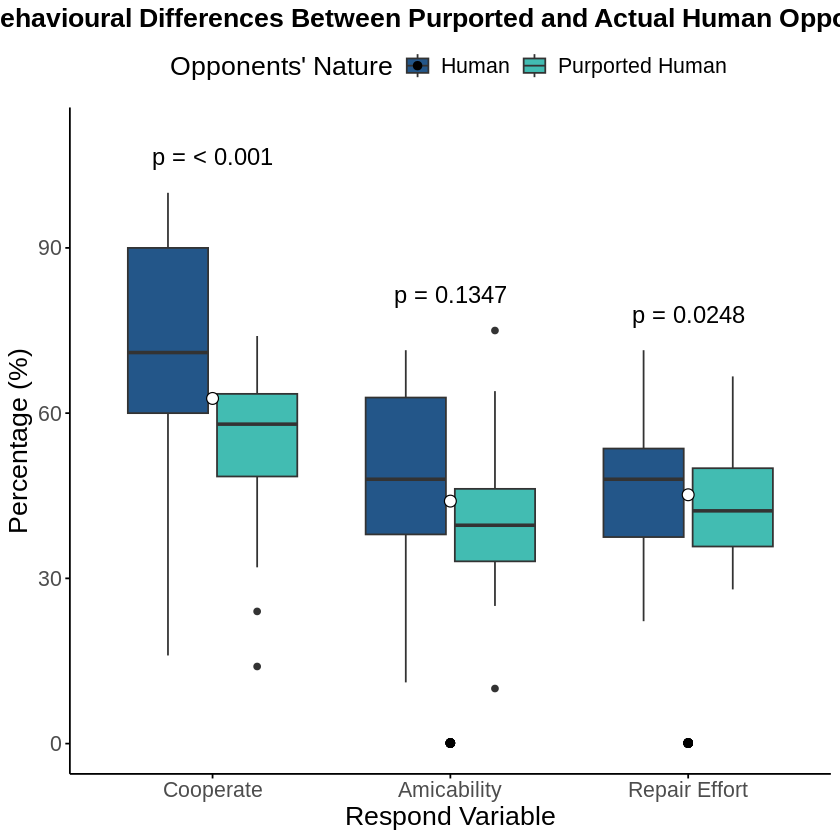

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

# 假设你已经有数据框 df
# 例如：df <- read.csv("your_data.csv")

# 数据过滤和因子变量转换
df_filtered <- df %>%
  filter(Model_type %in% c("Purported Human", "Human"))

df_filtered$Model_type <- as.factor(df_filtered$Model_type)

# 定义变量列表
variables <- c("Cooperate", "Be_Friendly", "Repair_Effort")

# 检查数据框中是否存在所有变量
missing_vars <- setdiff(variables, names(df_filtered))
if (length(missing_vars) > 0) {
  stop("数据框中缺少以下变量: ", paste(missing_vars, collapse = ", "))
}

# 打印过滤后的数据框头部
cat("过滤后的数据框头部:\n")
print(head(df_filtered))

# 对变量进行转换
df_filtered <- df_filtered %>%
  mutate(
    Cooperate = Cooperate * 100,
    Be_Friendly = Be_Friendly * 100,
    Repair_Effort = Repair_Effort * 100
  )

# 标记0%的数据
df_filtered <- df_filtered %>%
  mutate(across(all_of(variables), ~ ifelse(. == 0, 0.1, .)))

# 打印转换后的数据框头部
cat("转换后的数据框头部:\n")
print(head(df_filtered))

# 进行 Wilcoxon 符号秩检验
p_values <- sapply(variables, function(var) {
  df_sub <- df_filtered %>%
    select(Model_type, ID, !!sym(var))

  df_wide <- df_sub %>%
    pivot_wider(names_from = Model_type, values_from = !!sym(var))

  df_wide <- df_wide %>%
    mutate(across(c(`Purported Human`, Human), ~ . + runif(n(), -1e-10, 1e-10)))

  test_result <- tryCatch({
    wilcox.test(df_wide$`Purported Human`, df_wide$Human, paired = TRUE)
  }, warning = function(w) {
    message("变量 ", var, " 的警告信息: ", w$message)
    wilcox.test(df_wide$`Purported Human`, df_wide$Human, paired = TRUE, exact = FALSE)
  })

  return(test_result$p.value)
})

# 数据转换为长格式
df_long <- df_filtered %>%
  pivot_longer(cols = all_of(variables), names_to = "Variable", values_to = "Value")

# 确保变量名称一致
df_long$Variable <- factor(df_long$Variable, levels = variables)

# 创建包含变量和 p 值的数据框
p_values_df <- data.frame(Variable = variables, P_Value = p_values)

# 过滤掉0%的数据
df_long_no_zero <- df_long %>%
  filter(Value != 0.1)

# 打印长格式数据框和p值数据框
cat("长格式数据框头部:\n")
print(head(df_long_no_zero))
cat("P 值数据框:\n")
print(p_values_df)

# 计算 y 轴上限，确保所有注释都在图内
y_max <- max(df_long_no_zero$Value, na.rm = TRUE) + 30

# 自定义颜色方案
custom_colors <- c("Purported Human" = "#42BCB2", "Human" = "#235689")

p <- ggplot(df_long_no_zero, aes(x = Variable, y = Value, fill = Model_type)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 21, size = 3, color = "black", fill = "white") +
  scale_fill_manual(values = custom_colors) +
  theme_minimal() +
  labs(
    title = "Behavioural Differences Between Purported and Actual Human Opponents",
    x = "Respond Variable",  # 更改 x 轴标签
    y = "Percentage (%)",
    fill = "Opponents' Nature"
  ) +
  scale_y_continuous(limits = c(0, 110)) +
  scale_x_discrete(labels = c("Cooperate" = "Cooperate", "Be_Friendly" = "Amicability", "Repair_Effort" = "Repair Effort")) +  # 更改具体 x 轴标签
  theme(
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black"),
    axis.ticks = element_line(colour = "black"),
    text = element_text(size = 16),
    plot.title = element_text(size = 16, hjust = 0.5, face = "bold")  # 设置标题居中
  )

p <- p + geom_point(data = df_long %>% filter(Value == 0.1), aes(x = Variable, y = 0.1), color = "black", size = 2)

# 打印每组的中位数
for (var in variables) {
  median_values <- df_filtered %>%
    group_by(Model_type) %>%
    summarise(Median = median(get(var), na.rm = TRUE))
  cat("变量", var, "的中位数:\n")
  print(median_values)
}

# 添加 p 值注释
for (i in seq_along(variables)) {
  variable <- variables[i]
  p_val <- p_values_df$P_Value[p_values_df$Variable == variable]
  max_value <- max(df_long_no_zero$Value[df_long_no_zero$Variable == variable], na.rm = TRUE)

  if (is.na(max_value)) {
    cat("Variable:", variable, "has no valid max value.\n")
    next
  }

  annotation_position <- min(max_value + 5, 110 - 5)
  p_val_text <- ifelse(p_val < 0.001, "< 0.001", sprintf("%.4f", p_val))
  cat("Variable:", variable, "Annotation Position:", annotation_position, "Max Value:", max_value, "P Value:", p_val_text, "\n")

  p <- p +
    annotate("text", x = i, y = annotation_position, label = paste("p =", p_val_text), vjust = 0, size = 5)
}

print(p)

# 保存高清版的图
ggsave(
  filename = "human.pdf",  # 保存文件名
  plot = p,  # 指定要保存的图
  device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
  width = 10, height = 8,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)


In [ ]:
install.packages("reshape2")
install.packages("tidyr")
install.packages("ggridges")
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
# 创建热图，使用平方根缩放并将其横过来显示
p <- ggplot(combined_data, aes(x = Sex_Model, y = Rank, fill = Time, label = ID)) +
  geom_tile(color = "white") +
  geom_text(size = 2.5, color = "black") +  # 设置文本标签的大小
  scale_fill_gradientn(
    colors = c("#ffffd9", "#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8", "#253494", "#081d58", "#4b0082"),
    values = rescale(c(0, 100, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000)),
    trans = "sqrt", na.value = "grey50"
  ) +
  theme_minimal() +
  labs(title = "Completion Time by Opponents' Nature and Gender",
       x = "Gender & Purported Opponents' Nature",
       y = "Rank",
       fill = "Seconds") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),  # 设置 x 轴刻度文本的大小
    axis.text.y = element_text(size = 8),  # 设置 y 轴刻度文本的大小
    axis.title.x = element_text(size = 12),  # 设置 x 轴标签的大小
    axis.title.y = element_text(size = 12),  # 设置 y 轴标签的大小
    plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),  # 设置图标题的大小
    legend.title = element_text(size = 10),  # 设置图例标题的大小
    legend.text = element_text(size = 8),  # 设置图例文本的大小
    panel.grid.major = element_blank(),  # 去除主网格线
    panel.grid.minor = element_blank()  # 去除次网格线
  ) +
  scale_x_discrete(labels = x_axis_labels) +
  coord_fixed(ratio = 1)

# 绘制图形
print(p)

# 保存高清版的图
ggsave(
  filename = "time.pdf",  # 保存文件名
  plot = p,  # 指定要保存的图
  device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
  width = 10, height = 8,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)

ERROR: Error in rescale(c(0, 100, 200, 250, 300, 350, 400, 450, 500, 600, 700, : could not find function "rescale"


[1] "所有可能的比较组:"
[1] "比较组 1 : M_Purported Human vs M_Purported Rule-Based Agents"
[1] "比较组 2 : M_Purported Human vs M_Purported LLM Agents"
[1] "比较组 3 : M_Purported Human vs F_Purported Human"
[1] "比较组 4 : M_Purported Human vs F_Purported Rule-Based Agents"
[1] "比较组 5 : M_Purported Human vs F_Purported LLM Agents"
[1] "比较组 6 : M_Purported Rule-Based Agents vs M_Purported LLM Agents"
[1] "比较组 7 : M_Purported Rule-Based Agents vs F_Purported Human"
[1] "比较组 8 : M_Purported Rule-Based Agents vs F_Purported Rule-Based Agents"
[1] "比较组 9 : M_Purported Rule-Based Agents vs F_Purported LLM Agents"
[1] "比较组 10 : M_Purported LLM Agents vs F_Purported Human"
[1] "比较组 11 : M_Purported LLM Agents vs F_Purported Rule-Based Agents"
[1] "比较组 12 : M_Purported LLM Agents vs F_Purported LLM Agents"
[1] "比较组 13 : F_Purported Human vs F_Purported Rule-Based Agents"
[1] "比较组 14 : F_Purported Human vs F_Purported LLM Agents"
[1] "比较组 15 : F_Purported Rule-Based Agents vs F_Purported LLM Agents"
Comparing: 6 

Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”
Warning message:
“Computation failed in `stat_summary()`.
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”


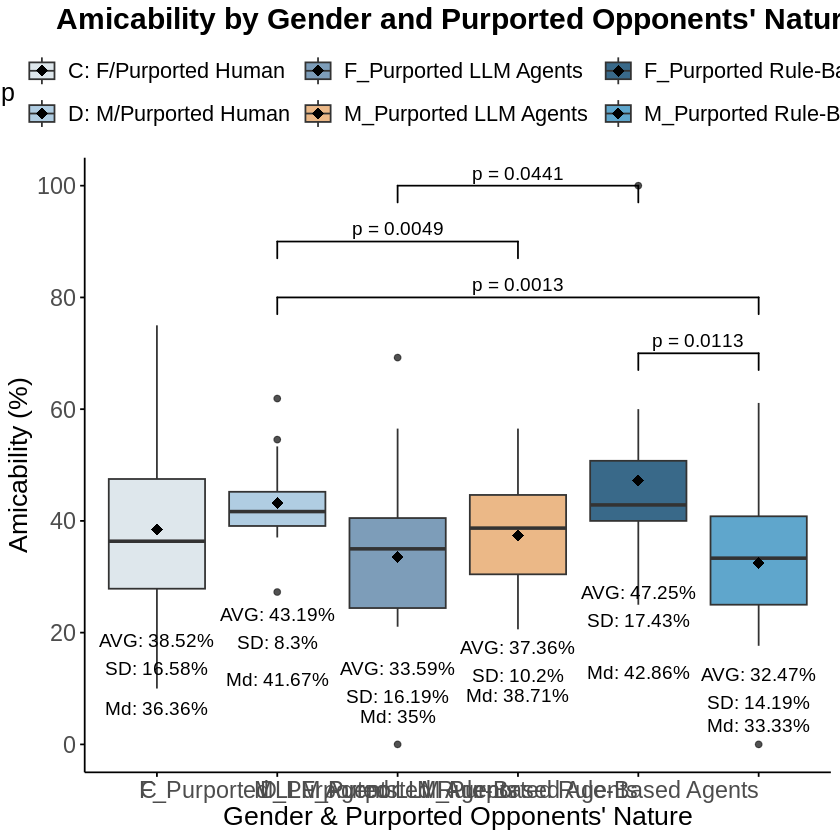

In [ ]:
#install.packages("ggpubr")
# 加载必要的包

library(ggplot2)
library(ggpubr)
library(dplyr)
library(ggsignif)

# 过滤掉 Human 类别
df_filtered <- df %>%
  filter(Model_type != "Human")

# 确保 Be_Friendly 列是数值型，并将其转换为百分比
df_filtered$Be_Friendly <- as.numeric(as.character(df_filtered$Be_Friendly)) * 100

# 创建分组变量
df_filtered$Group <- interaction(df_filtered$Sex, df_filtered$Model_type, sep = "_")

# 列出所有可能的比较组
comparisons <- combn(unique(df_filtered$Group), 2, simplify = FALSE)

# 打印所有可能的比较组
print("所有可能的比较组:")
for (i in 1:length(comparisons)) {
  print(paste("比较组", i, ":", comparisons[[i]][1], "vs", comparisons[[i]][2]))
}

# 选择需要显示的比较组（例如第 1 和第 3 个比较组）
selected_comparisons <- list(comparisons[[8]], comparisons[[1]], comparisons[[2]], comparisons[[15]])

# 手动指定选择的比较组的 p 值
selected_p_values <- c(0.0113, 0.0013, 0.0049, 0.0441)

# 格式化 p 值到小数点后四位
# formatted_p_values <- sprintf("%.4f", selected_p_values)

# 打印选择的比较组和对应的 p 值，进行验证
for (i in 1:length(selected_comparisons)) {
  cat("Comparing:", selected_comparisons[[i]][1], "vs", selected_comparisons[[i]][2], "\n")
  cat("p-value:", selected_p_values[i], "\n\n")
}

# 自定义颜色
# custom_colors <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")
custom_colors <- c("#D8E2E8", "#A2C4DD", "#668CAD", "#E7AC72", "#174F75", "#4396C3")



# 计算每组的均值、中位数和标准差
group_stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    mean = mean(Be_Friendly, na.rm = TRUE),
    median = median(Be_Friendly, na.rm = TRUE),
    sd = sd(Be_Friendly, na.rm = TRUE)
  )

# 自定义X轴标签和图例标签
x_labels <- c(
  "F_LLM" = "A",
  "M_LLM" = "B",
  "F_Purported Human" = "C",
  "M_Purported Human" = "D",
  "F_Purported Interpretable" = "E",
  "M_Purported Interpretable" = "F"

)

legend_labels <- c(
  "F_LLM" = "A: F/LLM Agent",
  "M_LLM" = "B: M/LLM Agent",
  "F_Purported Human" = "C: F/Purported Human",
  "M_Purported Human" = "D: M/Purported Human",
  "F_Purported Interpretable" = "E: F/Purported Rule-based AI Agent",
  "M_Purported Interpretable" = "F: M/Purported Rule-based AI Agent"
)

# 绘制箱线图并添加自定义注释
p <- ggplot(df_filtered, aes(x = Group, y = Be_Friendly, fill = Group)) +
  geom_boxplot(width = 0.8, alpha = 0.85) +  # 调整箱线图的宽度
  scale_fill_manual(values = custom_colors, labels = legend_labels) +
  # scale_fill_manual(values = custom_colors) +
  labs(title = "Amicability by Gender and Purported Opponents' Nature",
       x = "Gender & Purported Opponents' Nature",
       y = "Amicability (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14, hjust = 1),
        axis.text.y = element_text(size = 14),
        legend.position = "top", # 将图例放置在上方

        panel.grid = element_blank(),  # 去掉网格线
        axis.line = element_line(color = "black"),  # 添加x轴和y轴
        axis.ticks = element_line(color = "black"))+ # 添加刻度线

  stat_summary(fun = mean, geom = "point", shape = 18, size = 3, color = "black") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1),
               geom = "errorbar", color = "black", width = 0.2) +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) +  # 设置 y 轴的限制和间距
  scale_x_discrete(labels = x_labels)

# 添加手动指定的 p 值和比较线，并自定义注释内容
max_y <- max(df_filtered$Be_Friendly, na.rm = TRUE)
y_step <- 0.05 * (max_y - min(df_filtered$Be_Friendly, na.rm = TRUE))

# 调整 y_step 以确保比较线不太靠近箱线图
y_step <- 0.1 * (max_y - min(df_filtered$Be_Friendly, na.rm = TRUE))

# 打印调试信息
print(paste("max_y:", max_y))
print(paste("y_step:", y_step))

for (i in 1:length(selected_comparisons)) {
  comp <- selected_comparisons[[i]]
  p_val <- selected_p_values[i]
  annotation_text <- paste("p =", round(p_val, 4))
  print(paste("Comparison:", comp[1], "vs", comp[2], "p-value:", p_val, "y_position:", max_y + i * y_step)) # 调试信息
  p <- p + geom_signif(comparisons = list(as.character(comp)),
                       annotations = annotation_text,
                       y_position = max_y + (i - 4.5) * y_step,  # 将比较线往下一点
                       tip_length = 0.03,
                       textsize = 4)
}

# 添加均值、中位数和标准差的标签
for(i in 1:nrow(group_stats)) {
  p <- p + annotate("text", x = i, y = group_stats$mean[i] - 0.2 * max_y,
                    label = paste0("AVG: ", round(group_stats$mean[i], 2), "%"),
                    size = 4, color = "black") +
    annotate("text", x = i, y = group_stats$median[i] - 0.3 * max_y,
             label = paste0("Md: ", round(group_stats$median[i], 2), "%"),
             size = 4, color = "black") +
    annotate("text", x = i, y = group_stats$mean[i] -  0.25 * max_y,
             label = paste0("SD: ", round(group_stats$sd[i], 2), "%"),
             size = 4, color = "black")
}

# 调整图例文本和符号大小
p <- p + theme(
  legend.text = element_text(size = 13),  # 调整图例文本的大小
  legend.title = element_text(size = 15), # 调整图例标题的大小
  legend.key.size = unit(1.4, "lines")    # 调整图例符号的大小
)

# 显示图形
print(p)

# 保存高清版的图
ggsave(
  filename = "friendly.pdf",  # 保存文件名
  plot = p,  # 指定要保存的图
  device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
  width = 10, height = 8,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)





[1] "所有可能的比较组:"
[1] "比较组 1 : Purported Human vs Purported Interpretable"
[1] "比较组 2 : Purported Human vs LLM"
[1] "比较组 3 : Purported Interpretable vs LLM"
Comparing: Purported Human vs LLM 
p-value: 0.007 

Comparing: Purported Human vs Purported Interpretable 
p-value: 0.06 



Warning message in geom_density_ridges(scale = 1.2, rel_min_height = 0.01, alpha = 0.9, :
“Ignoring unknown parameters: `size`”


[1] "max_y: 66.6666666666667"
[1] "y_step: 6.66666666666667"
[1] "Comparison: Purported Human vs LLM p-value: 0.007 y_position: 73.3333333333334"
[1] "Comparison: Purported Human vs Purported Interpretable p-value: 0.06 y_position: 80"


Picking joint bandwidth of 4.24

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density_ridges()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Picking joint bandwidth of 4.24

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density_ridges()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”


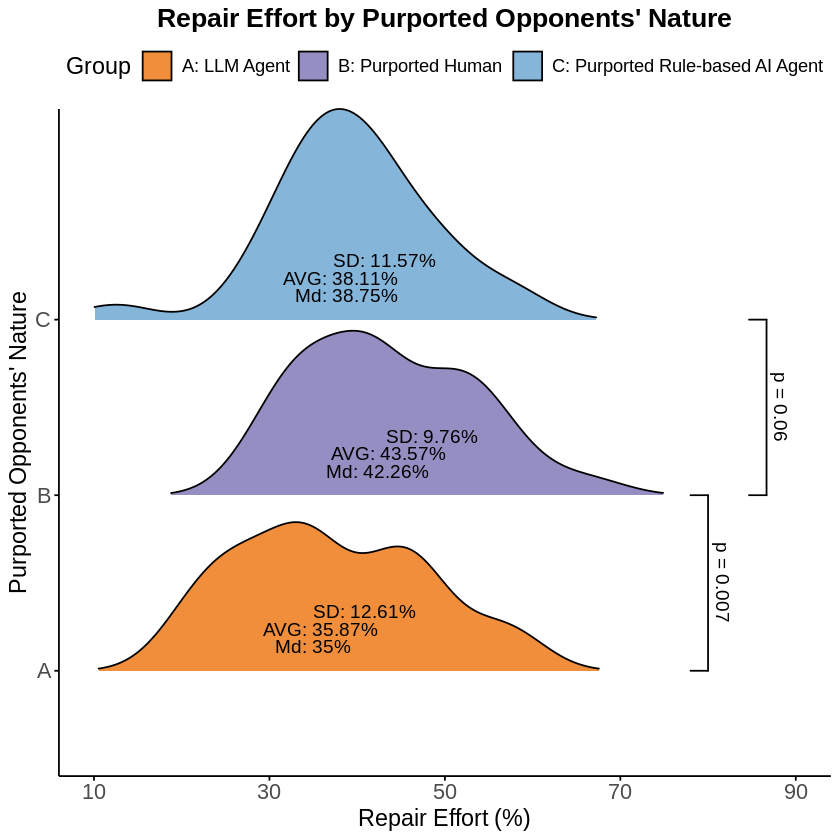

In [ ]:
if (!requireNamespace("ggridges", quietly = TRUE)) {
  install.packages("ggridges")
}
# 加载必要的包
#install.packages("ggpubr")
library(ggplot2)
library(ggpubr)
library(dplyr)
library(ggsignif)


# 过滤掉 Human 类别
df_filtered <- df %>%
  filter(Model_type != "Human")

# 确保 Repair_Effort 列是数值型，并将其转换为百分比
df_filtered$Repair_Effort <- as.numeric(as.character(df_filtered$Repair_Effort)) * 100

# 创建分组变量，仅根据 Model_type 进行分组
df_filtered$Group <- df_filtered$Model_type

# 列出所有可能的比较组
comparisons <- combn(unique(df_filtered$Group), 2, simplify = FALSE)

# 打印所有可能的比较组
print("所有可能的比较组:")
for (i in 1:length(comparisons)) {
  print(paste("比较组", i, ":", comparisons[[i]][1], "vs", comparisons[[i]][2]))
}

# 选择需要显示的比较组（例如第 1 和第 3 个比较组）
selected_comparisons <- list(comparisons[[2]],comparisons[[1]])

# 手动指定选择的比较组的 p 值
selected_p_values <- c(0.0070,0.060)

# 打印选择的比较组和对应的 p 值，进行验证
for (i in 1:length(selected_comparisons)) {
  cat("Comparing:", selected_comparisons[[i]][1], "vs", selected_comparisons[[i]][2], "\n")
  cat("p-value:", selected_p_values[i], "\n\n")
}

# 自定义颜色
custom_colors <- c("#EE8227", "#8982BB", "#79ADD6")

# 计算每组的均值、中位数和标准差
group_stats <- df_filtered %>%
  group_by(Group) %>%
  summarise(
    mean = mean(Repair_Effort, na.rm = TRUE),
    median = median(Repair_Effort, na.rm = TRUE),
    sd = sd(Repair_Effort, na.rm = TRUE)
  )

# 自定义X轴标签和图例标签
x_labels <- c(
  "LLM" = "A",
  "Purported Human" = "B",
  "Purported Interpretable" = "C"
)

legend_labels <- c(
  "LLM" = "A: LLM Agent",
  "Purported Human" = "B: Purported Human",
  "Purported Interpretable" = "C: Purported Rule-based AI Agent"
)


# 假设 df_filtered, custom_colors, legend_labels, x_labels, selected_comparisons, selected_p_values 和 group_stats 是预先定义的对象

p <- ggplot(df_filtered, aes(x = Repair_Effort, y = Group, fill = Group)) +
  geom_density_ridges(scale = 1.2, rel_min_height = 0.01, alpha = 0.9, size = 0.5) + # 绘制山峦图
  scale_fill_manual(values = custom_colors, labels = legend_labels) +
  labs(title = "Repair Effort by Purported Opponents' Nature",
       x = "Repair Effort (%)",
       y = "Purported Opponents' Nature") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13),
        legend.position = "top", # 将图例放置在上方
        panel.grid = element_blank(),  # 去掉网格线
        axis.line = element_line(color = "black"),  # 添加x轴和y轴
        axis.ticks = element_line(color = "black")) + # 添加刻度线
  scale_x_continuous(limits = c(10, 90), breaks = seq(10, 90, by = 20)) +  # 设置 x 轴的限制和间距
  scale_y_discrete(labels = x_labels)

# 添加手动指定的 p 值和比较线，并自定义注释内容
max_y <- max(df_filtered$Repair_Effort, na.rm = TRUE)
y_step <- 0.1 * (max_y - min(df_filtered$Repair_Effort, na.rm = TRUE))

# 打印调试信息
print(paste("max_y:", max_y))
print(paste("y_step:", y_step))

for (i in 1:length(selected_comparisons)) {
  comp <- selected_comparisons[[i]]
  p_val <- selected_p_values[i]
  annotation_text <- paste("p =", round(p_val, 4))
  print(paste("Comparison:", comp[1], "vs", comp[2], "p-value:", p_val, "y_position:", max_y + i * y_step)) # 调试信息
  p <- p + geom_signif(comparisons = list(as.character(comp)),
                       annotations = annotation_text,
                       y_position = max_y + (i + 0.5) * y_step,  # 将比较线往下一点
                       tip_length = 0.03,
                       textsize = 4)
}

# 添加均值、中位数和标准差的标签
for(i in 1:nrow(group_stats)) {
  p <- p + annotate("text", x = group_stats$mean[i], y = i + 0.2,
                    label = paste0("AVG: ", round(group_stats$mean[i], 2), "%"),
                    size = 4, color = "black", vjust = 0) +
    annotate("text", x = group_stats$median[i], y = i + 0.1,
             label = paste0("Md: ", round(group_stats$median[i], 2), "%"),
             size = 4, color = "black", vjust = 0) +
    annotate("text", x = group_stats$mean[i] + 5, y = i + 0.3,
             label = paste0("SD: ", round(group_stats$sd[i], 2), "%"),
             size = 4, color = "black", vjust = 0)
}

# 调整图例文本和符号大小
p <- p + theme(
  legend.text = element_text(size = 11),  # 调整图例文本的大小
  legend.title = element_text(size = 14), # 调整图例标题的大小
  legend.key.size = unit(1.3, "lines")    # 调整图例符号的大小
)

# 显示图形
print(p)

# 保存高清版的图
ggsave(
  filename = "repair.pdf",  # 保存文件名
  plot = p,  # 指定要保存的图
  device = cairo_pdf,  # 使用Cairo库保存高质量的PDF
  width = 8, height = 7,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)


要

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Picking joint bandwidth of 27.9



TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


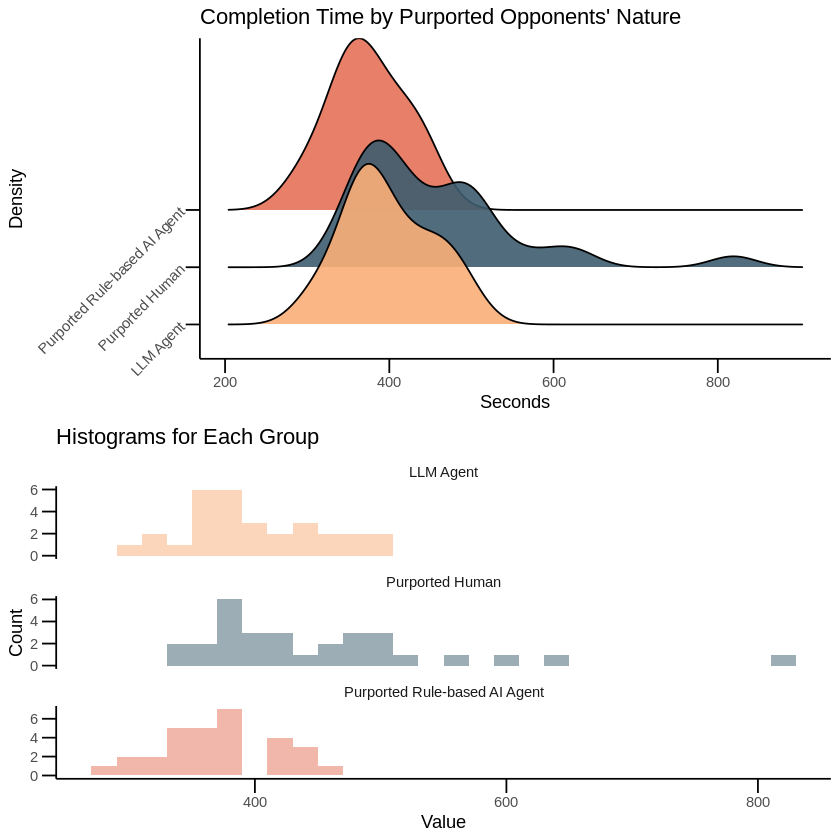

In [ ]:
# 安装并加载必要的包
# install.packages("ggridges")
install.packages("gridExtra")
library(ggplot2)
library(dplyr)
library(ggridges)
library(gridExtra)

# 将数据组织为数据框
data <- data.frame(
  Value = c(
    c(386, 482, 819, 631, 604, 490, 510, 484, 504, 440, 428, 559, 357, 465, 417, 382, 410, 501, 519, 373, 366, 385, 460, 400, 336, 346, 423, 396, 371, 381),
    c(348, 424, 390, 454, 421, 417, 347, 436, 425, 385, 390, 443, 303, 389, 377, 359, 359, 372, 443, 330, 352, 362, 359, 345, 345, 296, 390, 326, 288, 347),
    c(376, 435, 465, 495, 471, 402, 445, 461, 449, 420, 370, 494, 321, 405, 377, 368, 390, 416, 478, 305, 361, 373, 401, 371, 351, 312, 365, 371, 350, 361)
  ),
  Group = rep(c("Purported Human", "Purported Rule-based AI Agent", "LLM Agent"), each = 30)
)

# 定义颜色
colors <- c("Purported Human" = "#3D5C6F", "Purported Rule-based AI Agent" = "#E47159", "LLM Agent" = "#f9ae78")

# 创建山峦图
p_ridges <- ggplot(data, aes(x = Value, y = Group, fill = Group)) +
  geom_density_ridges(scale = 3, alpha = 0.9) +
  labs(title = "Completion Time by Purported Opponents' Nature", x = "Seconds", y = "Density") +
  theme_minimal() +
  scale_fill_manual(values = colors) +
  theme(
    legend.position = "none",
    axis.text.y = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),   # 去掉主网格线
    panel.grid.minor = element_blank(),   # 去掉次网格线
    axis.line = element_line(color = "black"),  # 保留轴线
    axis.ticks = element_line(color = "black"), # 保留刻度线
    axis.ticks.length = unit(0.3, "cm"),        # 调整刻度线长度
    axis.ticks.x.top = element_line(color = "black")  # 保留和设置顶部x轴刻度线
  )

# 创建带状图
p_histograms <- ggplot(data, aes(x = Value, fill = Group)) +
  geom_histogram(binwidth = 20, alpha = 0.5, position = "identity") +
  facet_wrap(~ Group, ncol = 1, scales = "free_y") +
  labs(title = "Histograms for Each Group", x = "Value", y = "Count") +
  theme_minimal() +
  scale_fill_manual(values = colors) +
  theme(
    legend.position = "none",
    panel.grid.major = element_blank(),   # 去掉主网格线
    panel.grid.minor = element_blank(),   # 去掉次网格线
    axis.line = element_line(color = "black"),  # 保留轴线
    axis.ticks = element_line(color = "black"), # 保留刻度线
    axis.ticks.length = unit(0.3, "cm"),        # 调整刻度线长度
    axis.ticks.x.top = element_line(color = "black")  # 保留和设置顶部x轴刻度线
  )

# 将两个图拼接在一起
combined_plot <- grid.arrange(p_ridges, p_histograms, ncol = 1)

# 显示组合图
print(combined_plot)


要

In [ ]:
install.packages("remotes")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(remotes)
remotes::install_version("fastmap", version = "1.2.0")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
remove.packages("fastmap")

# 使用 remotes 安装特定版本
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

remotes::install_version("fastmap", version = "1.2.0")


Removing package from ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 安装特定版本的 ggplot2
devtools::install_version("ggplot2", version = "3.5.0")

# 加载 ggplot2 和 ggdist 包
library(ggplot2)
library(ggdist)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 60 rows containing missing values or values outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 60 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 60 rows containing missing values or values outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 60 rows containing missing values or values outside the scale range
(`geom_point()`).”


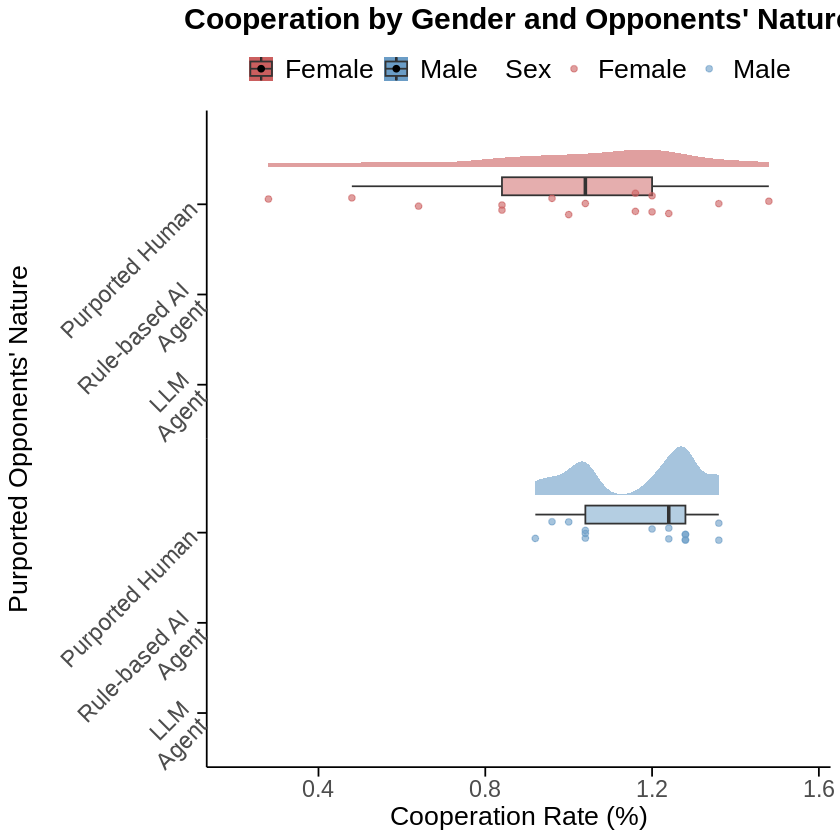

In [ ]:
# 加载必要的包
if (!require(dplyr)) install.packages("dplyr")
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(ggdist)) install.packages("ggdist")

library(dplyr)
library(ggplot2)
library(ggdist)

# 假设数据已经读取到名为 df 的数据框中

# 过滤掉 Model_type 为 "Human" 的数据
df_filtered <- df %>%
  filter(Model_type != "Human") %>%
  mutate(Cooperate = (Cooperate / 50) * 100)  # 计算合作率

# 定义颜色
color1 <- rgb(203, 95, 95, maxColorValue = 255)  # 红色
color2 <- rgb(107, 157, 198, maxColorValue = 255)  # 蓝色

# 创建自定义 Model_type 标签
model_labels <- c("Purported Human" = "Purported Human", "Purported Interpretable" = "Rule-based AI\nAgent", "LLM" = "LLM\nAgent")

# 确保 Model_type 是因子，并按照指定顺序排序
df_filtered$Model_type <- factor(df_filtered$Model_type, levels = c("LLM", "Purported Interpretable", "Purported Human"))

# 创建 raincloud 图
raincloud_plot <- ggplot(df_filtered, aes(x = Model_type, y = Cooperate, fill = Sex)) +
  stat_halfeye(adjust = .5, width = .6, .width = 0, justification = -0.4, point_colour = NA, alpha = 0.6, position = position_nudge(x = 0.2)) +  # 将密度图稍微向左移动
  geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.5, position = position_nudge(x = 0.2)) +  # 将箱线图稍微向右移动
  geom_jitter(aes(color = Sex), width = 0.15, height = 0, alpha = 0.6) +  # 添加抖动点
  scale_fill_manual(values = c("M" = color2, "F" = color1), labels = c("M" = "Male", "F" = "Female")) +  # 使用指定的红色和蓝色，并修改图例标签
  scale_color_manual(values = c("M" = color2, "F" = color1), labels = c("M" = "Male", "F" = "Female")) +  # 使用指定的红色和蓝色，并修改图例标签
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),  # 标题居中，字体大小调整为16，加粗
    axis.title.x = element_text(size = 16),  # x轴标题字体大小调整为14
    axis.title.y = element_text(size = 16),  # y轴标题字体大小调整为14
    axis.text.x = element_text(size = 14),  # x轴标签字体大小调整为12
    axis.text.y = element_text(size = 14, angle = 45, hjust = 1),  # y轴标签字体大小调整为12，旋转45度
    strip.text = element_blank(),  # 移除分面标签
    plot.margin = margin(0.2, 0.2, 0.2, 0.2, "cm"),  # 调整图表周围的空白
    panel.grid.major = element_blank(),  # 移除主要网格线
    panel.grid.minor = element_blank(),  # 移除次要网格线
    panel.border = element_blank(),  # 移除面板边框
    axis.line = element_line(color = "black"),  # 添加 x 和 y 轴线
    axis.ticks = element_line(color = "black"),  # 显示刻度线
    axis.ticks.length = unit(0.2, "cm"),  # 设置刻度线长度
    legend.position = "top",  # 将图例移到顶部
    legend.justification = "center",  # 将图例居中对齐
    legend.box.just = "center",
    legend.title = element_text(size = 16),  # 图例标题字体大小调整为14
    legend.text = element_text(size = 16),  # 图例文字字体大小调整为14
    legend.spacing.x = unit(0.2, 'cm') # 增加图例项之间的间距
  ) +
  labs(
    title = "Cooperation by Gender and Opponents' Nature",  # 标题
    x = "Purported Opponents' Nature",  # 修改横坐标标签名
    y = "Cooperation Rate (%)"  # 修改纵坐标标签名
  ) +
  scale_x_discrete(labels = model_labels, limits = c("LLM", "Purported Interpretable", "Purported Human")) +  # 自定义 x 轴标签和顺序
  facet_wrap(~ Sex, ncol = 1) +  # 按性别进行分面，使用一列
  coord_flip() +  # 翻转坐标
  theme(
    panel.spacing = unit(0, "lines"),  # 减少面板之间的空白
    plot.background = element_blank()  # 移除背景
  ) +
  guides(fill = guide_legend(title = NULL, override.aes = list(alpha = 1)))  # 修改图例填充的透明度

# 打印 raincloud 图
print(raincloud_plot)

# 保存高清版的 raincloud 图
ggsave(
  filename = "raincloud_plot_hd.pdf",  # 保存文件名
  plot = raincloud_plot,  # 指定要保存的图
  width = 10, height = 8,  # 图的宽度和高度（英寸）
  dpi = 300  # 高分辨率
)


In [ ]:
# 安装和加载必要的包
if (!require(ARTool)) install.packages('ARTool', dependencies=TRUE)
if (!require(dplyr)) install.packages('dplyr', dependencies=TRUE)
if (!require(tidyr)) install.packages('tidyr', dependencies=TRUE)
library(ARTool)
library(dplyr)
library(tidyr)

# 筛选出Model_type不是Human的数据
filtered_df <- df %>% filter(Model_type != "Human")

# 安装和加载必要的包
if (!require(ARTool)) install.packages('ARTool', dependencies=TRUE)
if (!require(dplyr)) install.packages('dplyr', dependencies=TRUE)
if (!require(tidyr)) install.packages('tidyr', dependencies=TRUE)
library(ARTool)
library(dplyr)
library(tidyr)

# 筛选出Model_type不是Human的数据
filtered_df <- df %>% filter(Model_type != "Human")

# 转换Sex和Model_type为因子
filtered_df <- filtered_df %>%
  mutate(
    Sex = factor(Sex),
    Model_type = factor(Model_type),
    ID = factor(ID)
  )

# 检查和转换因变量为数值型
dependent_vars <- c("Cooperate", "Time", "Earns", "Switchs", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")

filtered_df <- filtered_df %>%
  mutate(across(all_of(dependent_vars), as.numeric))

# 检查转换是否成功
# str(filtered_df)

# 进行ART ANOVA分析
for (dep_var in dependent_vars) {
  cat("\n\n### Analyzing", dep_var, "###\n")

  formula <- as.formula(paste(dep_var, "~ Sex * Model_type + (1|ID)"))

  # 进行ART ANOVA
  art_model <- art(formula, data = filtered_df)
  anova_results <- anova(art_model)

  print(anova_results)
}




### Analyzing Cooperate ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(Cooperate)

                       F Df Df.res    Pr(>F)   
1 Sex            0.17487  1     28 0.6790100   
2 Model_type     4.40312  2     56 0.0167492  *
3 Sex:Model_type 5.92235  2     56 0.0046432 **
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


### Analyzing Time ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(Time)

                       F Df Df.res     Pr(>F)    
1 Sex            13.2637  1     28  0.0010877  **
2 Model_type     61.1464  2     56 8.2704e-15 ***
3 Sex:Model_type  5.6236  2     56  0.0059483  **
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


### Analyzing Earns ###
Anal

In [ ]:
if (!require(ARTool)) install.packages('ARTool', dependencies=TRUE)
if (!require(dplyr)) install.packages('dplyr', dependencies=TRUE)
if (!require(tidyr)) install.packages('tidyr', dependencies=TRUE)
library(ARTool)
library(dplyr)
library(tidyr)

# 筛选出 Model_type 不是 Human 的数据
filtered_df <- df %>% filter(Model_type != "Human")

# 转换Sex和Model_type为因子
filtered_df <- filtered_df %>%
  mutate(
    Sex = factor(Sex),
    Model_type = factor(Model_type),
    ID = factor(ID)
  )

# 检查和转换因变量为数值型
dependent_vars <- c("Cooperate", "Time", "Be_Friendly", "Repair_Effort")

filtered_df <- filtered_df %>%
  mutate(across(all_of(dependent_vars), as.numeric))

# 进行 ART ANOVA 分析
for (dep_var in dependent_vars) {
  cat("\n\n### Analyzing", dep_var, "###\n")

  # 分析独立样本
  cat("\n### Independent Samples Analysis ###\n")
  formula_independent <- as.formula(paste(dep_var, "~ Sex * Model_type"))
  art_model_independent <- art(formula_independent, data = filtered_df)
  anova_results_independent <- anova(art_model_independent)
  print(anova_results_independent)

  # 分析关联样本
  cat("\n### Related Samples Analysis ###\n")
  formula_related <- as.formula(paste(dep_var, "~ Model_type * Sex + (1|ID)"))
  art_model_related <- art(formula_related, data = filtered_df)
  anova_results_related <- anova(art_model_related)
  print(anova_results_related)
}





### Analyzing Cooperate ###

### Independent Samples Analysis ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Anova Table (Type III tests) 
Model: No Repeated Measures (lm)
Response: art(Cooperate)

                 Df Df.res F value   Pr(>F)  
1 Sex             1     84 0.30747 0.580708  
2 Model_type      2     84 2.62431 0.078427 .
3 Sex:Model_type  2     84 3.73605 0.027900 *
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

### Related Samples Analysis ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(Cooperate)

                       F Df Df.res    Pr(>F)   
1 Model_type     4.40312  2     56 0.0167492  *
2 Sex            0.17487  1     28 0.6790100   
3 Model_type:Sex 5.92235  2     56 0.0046432 **
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


### Analyzing Time ###

### Ind

In [ ]:
# 安装并加载所需包
if (!require(ARTool)) install.packages('ARTool', dependencies=TRUE)
if (!require(dplyr)) install.packages('dplyr', dependencies=TRUE)
if (!require(tidyr)) install.packages('tidyr', dependencies=TRUE)
library(ARTool)
library(dplyr)
library(tidyr)

# 筛选出 Model_type 不是 Human 的数据
filtered_df <- df %>% filter(Model_type != "Human")

# 转换 Sex 和 Model_type 为因子
filtered_df <- filtered_df %>%
  mutate(
    Sex = factor(Sex),
    Model_type = factor(Model_type),
    ID = factor(ID)
  )

# 检查和转换因变量为数值型
dependent_vars <- c("Cooperate", "Time", "Be_Friendly", "Repair_Effort")

filtered_df <- filtered_df %>%
  mutate(across(all_of(dependent_vars), as.numeric))

# 初始化存储结果的列表
results <- list()

# 进行 ART ANOVA 分析
for (dep_var in dependent_vars) {
  cat("\n\n### Analyzing", dep_var, "###\n")
  results[[dep_var]] <- list()

  try({
    # 分析独立样本
    cat("\n### Independent Samples Analysis ###\n")
    formula_independent <- as.formula(paste(dep_var, "~ Sex * Model_type"))
    art_model_independent <- art(formula_independent, data = filtered_df)
    anova_results_independent <- anova(art_model_independent)
    print(anova_results_independent)
    results[[dep_var]]$independent <- anova_results_independent
  }, silent = TRUE)

  try({
    # 分析关联样本
    cat("\n### Related Samples Analysis ###\n")
    formula_related <- as.formula(paste(dep_var, "~ Model_type * Sex + (1|ID)"))
    art_model_related <- art(formula_related, data = filtered_df)
    anova_results_related <- anova(art_model_related)
    print(anova_results_related)
    results[[dep_var]]$related <- anova_results_related
  }, silent = TRUE)
}

Loading required package: ARTool

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ARTool’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘proxy’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘lazyeval’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘mnormt’, ‘GPArotation’, ‘expm’, ‘Exact’, ‘gld’, ‘rex’, ‘lme4’, ‘car’, ‘plyr’, ‘emmeans’, ‘pander’, ‘lmerTest’, ‘phia’, ‘psych’, ‘DescTools’, ‘covr’






### Analyzing Cooperate ###

### Independent Samples Analysis ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Anova Table (Type III tests) 
Model: No Repeated Measures (lm)
Response: art(Cooperate)

                 Df Df.res F value   Pr(>F)  
1 Sex             1     84 0.30747 0.580708  
2 Model_type      2     84 2.62431 0.078427 .
3 Sex:Model_type  2     84 3.73605 0.027900 *
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

### Related Samples Analysis ###
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(Cooperate)

                       F Df Df.res    Pr(>F)   
1 Model_type     4.40312  2     56 0.0167492  *
2 Sex            0.17487  1     28 0.6790100   
3 Model_type:Sex 5.92235  2     56 0.0046432 **
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


### Analyzing Time ###

### Ind

In [ ]:
library(dplyr)
library(ARTool)

# 假设 df 是你的数据框，并且 "Time" 列是以秒为单位的字符串形式
# 筛选出 Model_type 不为 Human 的数据
non_human_data <- df %>%
  filter(Model_type != "Human") %>%
  mutate(across(c(Sex, Model_type), as.factor),  # 确保 Sex 和 Model_type 被转换为因子类型
         Time = as.numeric(Time))  # 将 Time 列的字符串转换为数字

# 因变量列表
dependent_vars <- c("Cooperate", "Time", "Be_Friendly", "Repair_Effort")

# 对每个因变量进行 ART ANOVA
for (var in dependent_vars) {
  if (all(is.numeric(non_human_data[[var]]), na.rm = TRUE)) {
    art_model <- art(non_human_data[[var]] ~ Sex * Model_type, data = non_human_data)
    art_aov <- anova(art_model)
    print(paste("ART ANOVA result for", var))
    print(art_aov)
  } else {
    print(paste(var, "is not numeric or contains NA values, and will be skipped."))
  }
}


[1] "ART ANOVA result for Cooperate"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Anova Table (Type III tests) 
Model: No Repeated Measures (lm)
Response: art(non_human_data[[var]])

                 Df Df.res F value   Pr(>F)  
1 Sex             1     84 0.30747 0.580708  
2 Model_type      2     84 2.62431 0.078427 .
3 Sex:Model_type  2     84 3.73605 0.027900 *
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 
[1] "ART ANOVA result for Time"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Anova Table (Type III tests) 
Model: No Repeated Measures (lm)
Response: art(non_human_data[[var]])

                 Df Df.res F value     Pr(>F)    
1 Sex             1     84 33.8939 1.0341e-07 ***
2 Model_type      2     84 15.2783 2.1921e-06 ***
3 Sex:Model_type  2     84  1.4765    0.23431    
---
Signif. codes:   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 
[1] "ART ANOVA result for Be_Friendly"
Analysis of Variance of Aligned Ra

    Purported Interpretable Cooperate

In [ ]:
# 样本数据
A <- c(25, 23, 9, 33, 15, 26, 25, 23, 31, 22, 17, 20, 22, 8, 19)
B <- c(26, 14, 24, 35, 20, 31, 23, 24, 39, 28, 21, 31, 30, 31, 18)

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")



	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 69.5, p-value = 0.0773
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -10.0000429   0.9999769
sample estimates:
difference in location 
             -5.000072 


U值 (W值): 69.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.783557 
组A的统计信息:
Mean: 21.2 
Median: 22 
SD: 6.97137 

组B的统计信息:
Mean: 26.33333 
Median: 26 
SD: 6.704654 


    Purported Human Cooperate

In [ ]:
# 样本数据
A <- c(30, 34, 26, 32, 31, 32, 31, 23, 34, 26, 24, 26, 32, 25, 32)
B <- c(30, 7, 37, 29, 12, 30, 16, 31, 34, 29, 21, 26, 24, 21, 25)

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 154.5, p-value = 0.08394
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.9999649  8.9999199
sample estimates:
difference in location 
              2.999945 


U值 (W值): 70.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.742079 
组A的统计信息:
Mean: 29.2 
Median: 31 
SD: 3.764496 

组B的统计信息:
Mean: 24.8 
Median: 26 
SD: 8.239279 


    LLM Cooperate

In [ ]:
# 新的样本数据
A <- c(34, 30, 21, 35, 25, 28, 18, 28, 15, 31, 27, 19, 29, 17, 26)
B <- c(18, 5, 31, 34, 22, 21, 17, 28, 24, 14, 20, 21, 23, 32, 22)

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")



	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 140, p-value = 0.2621
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -2.999964  8.999954
sample estimates:
difference in location 
              3.999939 


U值 (W值): 85 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.140647 
组A的统计信息:
Mean: 25.53333 
Median: 27 
SD: 6.22055 

组B的统计信息:
Mean: 22.13333 
Median: 22 
SD: 7.395623 


    Purported Human Befriendly

In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(54.55, 41.67, 38.89, 27.27, 43.75, 40.91, 38.10, 42.31, 61.90, 39.29, 53.33, 40.00, 42.11, 37.04, 46.67) / 100
B <- c(37.50, 10.00, 64.00, 50.00, 26.32, 29.41, 25.00, 52.00, 38.89, 32.00, 31.25, 75.00, 45.00, 36.36, 25.00) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)


# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 150.5, p-value = 0.1198
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.03335484  0.14588834
sample estimates:
difference in location 
            0.06886667 


U值 (W值): 74.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.576167 
组A的统计信息:
Mean: 0.43186 
Median: 0.4167 
SD: 0.0830172 

组B的统计信息:
Mean: 0.3851533 
Median: 0.3636 
SD: 0.1657778 


    Purported Interpretable Befriendly


In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(39.13, 27.59, 0.00, 33.33, 25.00, 45.16, 42.11, 61.11, 40.91, 40.74, 30.43, 25.00, 21.43, 37.50, 17.65) / 100
B <- c(25.00, 41.67, 42.86, 59.38, 40.91, 100.00, 45.45, 40.00, 60.00, 40.00, 31.58, 50.00, 51.52, 47.06, 33.33) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)


# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 51, p-value = 0.01134
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.22052900 -0.02120934
sample estimates:
difference in location 
            -0.1238572 


U值 (W值): 51 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -2.550901 
组A的统计信息:
Mean: 0.3247267 
Median: 0.3333 
SD: 0.1419162 

组B的统计信息:
Mean: 0.4725067 
Median: 0.4286 
SD: 0.1742625 


    LLM Befriendly
    非正态分布, Mann-Whitney Test, p-value = 0.4526 > 0.05

In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(47.83, 31.25, 33.33, 38.89, 42.86, 23.81, 40.00, 46.43, 20.59, 56.52, 38.71, 29.63, 50.00, 27.27, 33.33) / 100
B <- c(25.00, 0.00, 42.31, 56.52, 21.43, 21.05, 26.47, 42.86, 23.81, 35.00, 29.41, 35.00, 38.71, 69.23, 37.04) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 136, p-value = 0.3398
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.0537411  0.1352133
sample estimates:
difference in location 
            0.04124375 


U值 (W值): 89 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -0.9747346 
组A的统计信息:
Mean: 0.3736333 
Median: 0.3871 
SD: 0.1019928 

组B的统计信息:
Mean: 0.3358933 
Median: 0.35 
SD: 0.1619318 


    Purported Human Repair-Effort

In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(54.55, 50.00, 50.00, 31.82, 50.00, 50.00, 52.38, 34.62, 33.33, 42.86, 40.00, 33.33, 36.84, 44.44, 53.33) / 100
B <- c(56.25, 30.00, 36.00, 40.00, 31.58, 41.18, 35.71, 60.00, 66.67, 28.00, 43.75, 41.67, 55.00, 40.91, 42.86) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 120, p-value = 0.7712
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.06677112  0.09092786
sample estimates:
difference in location 
            0.01680028 


U值 (W值): 105 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -0.3110855 
组A的统计信息:
Mean: 0.4383333 
Median: 0.4444 
SD: 0.08215632 

组B的统计信息:
Mean: 0.4330533 
Median: 0.4118 
SD: 0.1137989 


    Purported Interpretable Repair-Effort

In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(56.52, 41.38, 0.00, 58.33, 34.38, 45.16, 47.37, 44.44, 40.91, 37.04, 34.78, 31.25, 28.57, 12.50, 35.29) / 100
B <- c(37.50, 50.00, 35.71, 37.50, 50.00, 33.33, 31.82, 28.00, 40.00, 40.00, 42.11, 50.00, 42.42, 35.29, 41.67) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 100.5, p-value = 0.6331
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.08617863  0.05698115
sample estimates:
difference in location 
           -0.01204134 


U值 (W值): 100.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -0.4977368 
组A的统计信息:
Mean: 0.36528 
Median: 0.3704 
SD: 0.150824 

组B的统计信息:
Mean: 0.3969 
Median: 0.4 
SD: 0.06655532 


    LLM Repair-Effort
   

In [ ]:
# 新的样本数据（百分比转换为小数）
A <- c(21.74, 25.00, 33.33, 44.44, 42.86, 42.86, 35.00, 46.43, 20.59, 47.83, 32.26, 25.93, 28.57, 27.27, 29.17) / 100
B <- c(35.00, 0.00, 34.62, 47.83, 35.71, 21.05, 41.18, 35.71, 57.14, 25.00, 47.06, 55.00, 58.06, 46.15, 33.33) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 78, p-value = 0.1582
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.14276819  0.03566383
sample estimates:
difference in location 
           -0.06433659 


U值 (W值): 78 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.430993 
组A的统计信息:
Mean: 0.33552 
Median: 0.3226 
SD: 0.09210242 

组B的统计信息:
Mean: 0.3818933 
Median: 0.3571 
SD: 0.1527247 


    Purported Human Befirendly Weighted

In [ ]:
A <- c(51.90, 41.43, 51.79, 45.79, 41.11, 47.33, 70.24, 54.38, 76.79, 50.15, 73.08, 40.18, 45.00, 38.69, 54.17) / 100
B <- c(37.78, 10.00, 66.43, 50.00, 30.00, 29.52, 26.90, 51.67, 40.28, 43.06, 37.50, 81.25, 61.67, 43.67, 22.42) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 161, p-value = 0.04649
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 0.001234551 0.218992542
sample estimates:
difference in location 
             0.1050111 


U值 (W值): 64 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -2.011686 
组A的统计信息:
Mean: 0.5213533 
Median: 0.5015 
SD: 0.1213537 

组B的统计信息:
Mean: 0.4214333 
Median: 0.4028 
SD: 0.1824743 


    Purported Interpretable Befriendly Weighted

In [ ]:
A <- c(47.92, 27.42, 0.00, 33.33, 25.00, 70.39, 71.79, 62.50, 79.69, 44.40, 31.95, 25.00, 22.50, 37.50, 17.14) / 100
B <- c(25.00, 43.75, 42.86, 60.93, 45.71, 100.00, 54.17, 43.42, 77.78, 62.50, 30.95, 55.36, 57.23, 76.92, 60.00) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 68.5, p-value = 0.07103
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.316685395  0.009958136
sample estimates:
difference in location 
            -0.1786494 


U值 (W值): 68.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.825035 
组A的统计信息:
Mean: 0.3976867 
Median: 0.3333 
SD: 0.2275587 

组B的统计信息:
Mean: 0.55772 
Median: 0.5536 
SD: 0.1910577 


    Purported LLM Befriendly Weighted

In [ ]:
A <- c(58.33, 31.25, 36.06, 42.06, 47.06, 25.93, 20.00, 46.11, 18.77, 57.00, 37.20, 29.67, 57.50, 27.27, 35.71) / 100
B <- c(25.00, 0.00, 43.81, 57.00, 26.64, 21.05, 28.04, 50.00, 34.03, 63.89, 29.29, 42.50, 41.33, 84.00, 55.56) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 108.5, p-value = 0.8846
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.1428846  0.1070398
sample estimates:
difference in location 
           -0.01047212 


U值 (W值): 108.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -0.1659123 
组A的统计信息:
Mean: 0.3799467 
Median: 0.3606 
SD: 0.1308791 

组B的统计信息:
Mean: 0.4014267 
Median: 0.4133 
SD: 0.2038216 


    Purported Human Repair-Effort Weighted

In [ ]:
A <- c(60.00, 51.43, 58.93, 38.64, 54.72, 63.11, 54.17, 35.63, 38.57, 47.49, 44.23, 33.04, 41.67, 45.83, 54.17) / 100
B <- c(57.78, 30.00, 36.67, 51.25, 35.00, 42.86, 35.95, 62.78, 68.06, 27.50, 45.83, 43.75, 53.33, 42.67, 43.26) / 100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 135.5, p-value = 0.3506
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.04948854  0.11497653
sample estimates:
difference in location 
            0.03048664 


U值 (W值): 89.5 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -0.9539956 
组A的统计信息:
Mean: 0.4810867 
Median: 0.4749 
SD: 0.09400854 

组B的统计信息:
Mean: 0.4511267 
Median: 0.4326 
SD: 0.117026 


    Purported Interpretable Repair-Effort Weighted


In [ ]:
A <- c(54.17, 41.82, 0.00, 58.33, 34.38, 46.22, 40.17, 45.83, 46.88, 33.45, 38.61, 31.25, 35.00, 12.50, 36.43)/100
B <- c(37.50, 56.25, 35.71, 40.37, 51.43, 36.11, 35.42, 35.53, 77.78, 43.75, 45.24, 52.38, 58.42, 43.59, 45.00)/100
# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 75, p-value = 0.1249
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.16424973  0.01639638
sample estimates:
difference in location 
           -0.05206478 


U值 (W值): 75 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.555428 
组A的统计信息:
Mean: 0.3700267 
Median: 0.3861 
SD: 0.1481396 

组B的统计信息:
Mean: 0.4629867 
Median: 0.4375 
SD: 0.1158752 


    LLM Repair-Effort Weighted

In [ ]:
A <- c(30.90, 25.00, 36.87, 58.73, 76.47, 44.44, 35.00, 45.56, 32.50, 48.00, 33.48, 26.10, 27.50, 27.27, 27.86)/100
B <- c(33.33, 0.00, 41.43, 48.00, 35.04, 21.05, 44.97, 41.67, 73.61, 36.11, 46.43, 54.58, 62.67, 48.00, 39.58)/100

# Mann-Whitney U检验
wilcox.test(A, B, exact=FALSE, conf.int=TRUE)

# 计算样本大小
n1 <- length(A)
n2 <- length(B)

# 合并数据并计算秩
combined_data <- c(A, B)
ranks <- rank(combined_data)

# 计算第一组的秩和
R1 <- sum(ranks[1:n1])

# 计算U值
U1 <- n1 * n2 + (n1 * (n1 + 1)) / 2 - R1
U2 <- n1 * n2 - U1
U <- min(U1, U2)

# 计算期望值E(U)和标准差σ(U)
E_U <- n1 * n2 / 2
sigma_U <- sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# 计算Z值
Z <- (U - E_U) / sigma_U

# 打印结果
cat("U值 (W值):", U, "\n")
cat("期望值 E(U):", E_U, "\n")
cat("标准差σ(U):", sigma_U, "\n")
cat("Z值:", Z, "\n")

# 计算组A的描述性统计信息
summary_A <- summary(A)
mean_A <- mean(A)
median_A <- median(A)
variance_A <- var(A)
sd_A <- sd(A)

# 计算组B的描述性统计信息
summary_B <- summary(B)
mean_B <- mean(B)
median_B <- median(B)
variance_B <- var(B)
sd_B <- sd(B)

# 打印组A的统计信息
cat("组A的统计信息:\n")
cat("Mean:", mean_A, "\n")
cat("Median:", median_A, "\n")
cat("SD:", sd_A, "\n\n")

# 打印组B的统计信息
cat("组B的统计信息:\n")
cat("Mean:", mean_B, "\n")
cat("Median:", median_B, "\n")
cat("SD:", sd_B, "\n")



	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 81, p-value = 0.1983
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.14873366  0.04857269
sample estimates:
difference in location 
           -0.07175088 


U值 (W值): 81 
期望值 E(U): 112.5 
标准差σ(U): 24.10913 
Z值: -1.306559 
组A的统计信息:
Mean: 0.3837867 
Median: 0.3348 
SD: 0.1428368 

组B的统计信息:
Mean: 0.4176467 
Median: 0.4167 
SD: 0.170122 


不分性别的cooperate PH VS PI

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Model_type为Purported Human的Cooperate值
cooperate_ph <- df %>% filter(Model_type == "Purported Human") %>% pull(Cooperate)

# 筛选出Model_type为Purported Interpretable的Cooperate值
cooperate_pi <- df %>% filter(Model_type == "Purported Interpretable") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_ph, cooperate_pi, paired = TRUE)

# 打印Wilcoxon符号秩检验结果
print(wilcox_test_result)

# 计算样本大小
n <- length(cooperate_ph)  # 假设cooperate_ph和cooperate_pi的长度相同，如果不同，则需额外处理

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_ph <- summary(cooperate_ph)
summary_stats_pi <- summary(cooperate_pi)

# 计算并打印中位数、平均值和标准差
median_ph <- median(cooperate_ph)
mean_ph <- mean(cooperate_ph)
sd_ph <- sd(cooperate_ph)

median_pi <- median(cooperate_pi)
mean_pi <- mean(cooperate_pi)
sd_pi <- sd(cooperate_pi)

# 打印组Purported Human的统计信息
cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n\n")

# 打印组Purported Interpretable的统计信息
cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")


Warning message in wilcox.test.default(cooperate_ph, cooperate_pi, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(cooperate_ph, cooperate_pi, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_ph and cooperate_pi
V = 284.5, p-value = 0.06479
alternative hypothesis: true location shift is not equal to 0

[1] "Z value: 1.06955364645449"
Purported Human 的统计信息:
Mean: 0.54 
Median: 0.58 
SD: 0.1335974 

Purported Interpretable 的统计信息:
Mean: 0.4753333 
Median: 0.47 
SD: 0.1441918 


In [ ]:
不分性别 PH VS LLM

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Model_type为Purported Human的Cooperate值
cooperate_ph <- df %>% filter(Model_type == "Purported Human") %>% pull(Cooperate)
# print(cooperate_ph)
# 筛选出Model_type为LLM的Cooperate值
cooperate_llm <- df %>% filter(Model_type == "LLM") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_ph, cooperate_llm, paired = TRUE)

# 显示结果
wilcox_test_result

# 计算样本大小
n <- length(cooperate_ph)

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_ph <- summary(cooperate_ph)
summary_stats_llm <- summary(cooperate_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(cooperate_ph)
mean_ph <- mean(cooperate_ph)
sd_ph <- sd(cooperate_ph)

median_llm <- median(cooperate_llm)
mean_llm <- mean(cooperate_llm)
sd_llm <- sd(cooperate_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")


cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")


Warning message in wilcox.test.default(cooperate_ph, cooperate_llm, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_ph and cooperate_llm
V = 341.5, p-value = 0.02559
alternative hypothesis: true location shift is not equal to 0


[1] "Z value: 2.24194898968346"
Purported Human 的统计信息:
Mean: 0.54 
Median: 0.58 
SD: 0.1335974 
LLM 的统计信息:
Mean: 0.4766667 
Median: 0.47 
SD: 0.1386719 



不分性别 PI VS LLM

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Model_type为Purported Interpretable的Cooperate值
cooperate_pi <- df %>% filter(Model_type == "Purported Interpretable") %>% pull(Cooperate)

# 筛选出Model_type为LLM的Cooperate值
cooperate_llm <- df %>% filter(Model_type == "LLM") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_pi, cooperate_llm, paired = TRUE)

# 显示结果
wilcox_test_result

# 计算样本大小
n <- length(cooperate_pi)

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_pi <- summary(cooperate_pi)
summary_stats_llm <- summary(cooperate_llm)

# 计算并打印中位数、平均值和标准差
median_pi <- median(cooperate_pi)
mean_pi <- mean(cooperate_pi)
sd_pi <- sd(cooperate_pi)

median_llm <- median(cooperate_llm)
mean_llm <- mean(cooperate_llm)
sd_llm <- sd(cooperate_llm)

# 打印组Purported Interpretable的统计信息
cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n\n")

# 打印组LLM的统计信息
cat("llm 的统计信息:\n")
cat("Mean:", mean_llm, "\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n")

Warning message in wilcox.test.default(cooperate_pi, cooperate_llm, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_pi and cooperate_llm
V = 221, p-value = 0.8209
alternative hypothesis: true location shift is not equal to 0


[1] "Z value: -0.236535902581282"
Purported Interpretable 的统计信息:
Mean: 0.4753333 
Median: 0.47 
SD: 0.1441918 

llm 的统计信息:
Mean: 0.4766667 
Median: 0.47 
SD: 0.1386719 


    Male:
    Purported Human vs Purported Interpretable Cooperate

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Cooperate值
cooperate_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Cooperate)

# 筛选出Model_type为Purported Interpretable的Cooperate值
cooperate_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_ph, cooperate_pi, paired = TRUE)

# 打印Wilcoxon符号秩检验结果
print(wilcox_test_result)

# 计算样本大小
n <- length(cooperate_ph)  # 假设cooperate_ph和cooperate_pi的长度相同，如果不同，则需额外处理

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_ph <- summary(cooperate_ph)
summary_stats_pi <- summary(cooperate_pi)

# 计算并打印中位数、平均值和标准差
median_ph <- median(cooperate_ph)
mean_ph <- mean(cooperate_ph)
sd_ph <- sd(cooperate_ph)

median_pi <- median(cooperate_pi)
mean_pi <- mean(cooperate_pi)
sd_pi <- sd(cooperate_pi)

# 打印组Purported Human的统计信息
cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n\n")

# 打印组Purported Interpretable的统计信息
cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

Warning message in wilcox.test.default(cooperate_ph, cooperate_pi, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(cooperate_ph, cooperate_pi, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_ph and cooperate_pi
V = 37, p-value = 0.3449
alternative hypothesis: true location shift is not equal to 0

[1] "Z value: -1.30631221876825"
Purported Human 的统计信息:
Mean: 0.496 
Median: 0.52 
SD: 0.1647856 

Purported Interpretable 的统计信息:
Mean: 0.5266667 
Median: 0.52 
SD: 0.1340931 


    Male:
    Purported Human vs LLM Cooperate

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Cooperate值
cooperate_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Cooperate)
# print(cooperate_ph)
# 筛选出Model_type为LLM的Cooperate值
cooperate_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_ph, cooperate_llm, paired = TRUE)

# 显示结果
wilcox_test_result

# 计算样本大小
n <- length(cooperate_ph)

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_ph <- summary(cooperate_ph)
summary_stats_llm <- summary(cooperate_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(cooperate_ph)
mean_ph <- mean(cooperate_ph)
sd_ph <- sd(cooperate_ph)

median_llm <- median(cooperate_llm)
mean_llm <- mean(cooperate_llm)
sd_llm <- sd(cooperate_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")


cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")


Warning message in wilcox.test.default(cooperate_ph, cooperate_llm, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_ph and cooperate_llm
V = 85, p-value = 0.164
alternative hypothesis: true location shift is not equal to 0


[1] "Z value: 1.41990458561766"
Purported Human 的统计信息:
Mean: 0.496 
Median: 0.52 
SD: 0.1647856 
LLM 的统计信息:
Mean: 0.4426667 
Median: 0.44 
SD: 0.1479125 



    Male:
    Purported Interpretable vs LLM Cooperate

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Interpretable的Cooperate值
cooperate_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Cooperate)

# 筛选出Model_type为LLM的Cooperate值
cooperate_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Cooperate)

# 进行Wilcoxon符号秩检验
wilcox_test_result <- wilcox.test(cooperate_pi, cooperate_llm, paired = TRUE)

# 显示结果
wilcox_test_result

# 计算样本大小
n <- length(cooperate_pi)

# 计算期望和标准差
expected_T <- n * (n + 1) / 4
sd_T <- sqrt(n * (n + 1) * (2 * n + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value <- wilcox_test_result$statistic

# 计算Z值
Z_value <- (T_value - expected_T) / sd_T

# 打印Z值
print(paste("Z value:", Z_value))

# 汇总统计信息
summary_stats_pi <- summary(cooperate_pi)
summary_stats_llm <- summary(cooperate_llm)

# 计算并打印中位数、平均值和标准差
median_pi <- median(cooperate_pi)
mean_pi <- mean(cooperate_pi)
sd_pi <- sd(cooperate_pi)

median_llm <- median(cooperate_llm)
mean_llm <- mean(cooperate_llm)
sd_llm <- sd(cooperate_llm)

# 打印组Purported Interpretable的统计信息
cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n\n")

# 打印组LLM的统计信息
cat("llm 的统计信息:\n")
cat("Mean:", mean_llm, "\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n")

Warning message in wilcox.test.default(cooperate_pi, cooperate_llm, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  cooperate_pi and cooperate_llm
V = 93, p-value = 0.06486
alternative hypothesis: true location shift is not equal to 0


[1] "Z value: 1.87427405301531"
Purported Interpretable 的统计信息:
Mean: 0.5266667 
Median: 0.52 
SD: 0.1340931 

llm 的统计信息:
Mean: 0.4426667 
Median: 0.44 
SD: 0.1479125 


    Male:
    Purported Human vs Purported Interpretable Befriendly
    Purported Human vs LLM Befriendly
    Purported Interpretable vs LLM Befriendly

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Befriendly值
be_friendly_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Be_Friendly)

# 筛选出Model_type为Purported Interpretable的Befriendly值
be_friendly_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Be_Friendly)

# 筛选出Model_type为LLM的Befriendly值
be_friendly_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Be_Friendly)

# print(be_friendly_llm)

# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(be_friendly_ph, be_friendly_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(be_friendly_ph, be_friendly_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(be_friendly_pi, be_friendly_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(be_friendly_ph != be_friendly_pi)
n_ph_llm <- sum(be_friendly_ph != be_friendly_llm)
n_pi_llm <- sum(be_friendly_pi != be_friendly_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(be_friendly_ph)
summary_stats_pi <- summary(be_friendly_pi)
summary_stats_llm <- summary(be_friendly_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(be_friendly_ph)
mean_ph <- mean(be_friendly_ph)
sd_ph <- sd(be_friendly_ph)

median_pi <- median(be_friendly_pi)
mean_pi <- mean(be_friendly_pi)
sd_pi <- sd(be_friendly_pi)

median_llm <- median(be_friendly_llm)
mean_llm <- mean(be_friendly_llm)
sd_llm <- sd(be_friendly_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")

Warning message in wilcox.test.default(be_friendly_pi, be_friendly_llm, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank exact test

data:  be_friendly_ph and be_friendly_pi
V = 40, p-value = 0.2769
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  be_friendly_ph and be_friendly_llm
V = 86, p-value = 0.1514
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  be_friendly_pi and be_friendly_llm
V = 85, p-value = 0.04455
alternative hypothesis: true location shift is not equal to 0


[1] "Z value between PH and PI: -1.13592366849413"
[1] "Z value between PH and LLM: 1.47670076904237"
[1] "Z value between PI and LLM: 2.04023566686662"
Purported Human 的统计信息:
Mean: 0.3851534 
Median: 0.3636364 
SD: 0.165779 
Purported Interpretable 的统计信息:
Mean: 0.4725033 
Median: 0.4286 
SD: 0.1742579 
LLM 的统计信息:
Mean: 0.335893 
Median: 0.35 
SD: 0.1619321 



    Male:
    Purported Human vs Purported Interpretable Repair-Effort
    Purported Human vs LLM Repair-Effort
    Purported Interpretable vs LLM Repair-Effort

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Repair_Effort值
repair_effort_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Repair_Effort)

# 筛选出Model_type为Purported Interpretable的Repair_Effort值
repair_effort_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Repair_Effort)

# 筛选出Model_type为LLM的Repair_Effort值
repair_effort_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Repair_Effort)


# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(repair_effort_ph, repair_effort_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(repair_effort_ph, be_friendly_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PI 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(repair_effort_pi, repair_effort_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(repair_effort_ph != be_friendly_pi)
n_ph_llm <- sum(repair_effort_ph != repair_effort_llm)
n_pi_llm <- sum(repair_effort_pi != repair_effort_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(repair_effort_ph)
summary_stats_pi <- summary(repair_effort_pi)
summary_stats_llm <- summary(repair_effort_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(repair_effort_ph)
mean_ph <- mean(repair_effort_ph)
sd_ph <- sd(repair_effort_ph)

median_pi <- median(repair_effort_pi)
mean_pi <- mean(repair_effort_pi)
sd_pi <- sd(repair_effort_pi)

median_llm <- median(repair_effort_llm)
mean_llm <- mean(repair_effort_llm)
sd_llm <- sd(repair_effort_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_pi
V = 79, p-value = 0.3028
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_ph and be_friendly_llm
V = 93, p-value = 0.06372
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_pi and repair_effort_llm
V = 57, p-value = 0.8904
alternative hypothesis: true location shift is not equal to 0


[1] "Z value between PH and PI: 1.07912748506942"
[1] "Z value between PH and LLM: 1.87427405301531"
[1] "Z value between PI and LLM: -0.170388550274119"
Purported Human 的统计信息:
Mean: 0.4330462 
Median: 0.4117647 
SD: 0.1137937 
Purported Interpretable 的统计信息:
Mean: 0.3969012 
Median: 0.4 
SD: 0.06655194 
LLM 的统计信息:
Mean: 0.3819048 
Median: 0.3571429 
SD: 0.1527263 



不分性别

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "M")

# 筛选出Model_type为Purported Human的Repair_Effort值
repair_effort_ph <- df %>% filter(Model_type == "Purported Human") %>% pull(Repair_Effort)

# 筛选出Model_type为Purported Interpretable的Repair_Effort值
repair_effort_pi <- df%>% filter(Model_type == "Purported Interpretable") %>% pull(Repair_Effort)

# 筛选出Model_type为LLM的Repair_Effort值
repair_effort_llm <- df%>% filter(Model_type == "LLM") %>% pull(Repair_Effort)


# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(repair_effort_ph, repair_effort_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(repair_effort_ph, repair_effort_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PI 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(repair_effort_pi, repair_effort_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(repair_effort_ph != repair_effort_pi)
n_ph_llm <- sum(repair_effort_ph != repair_effort_llm)
n_pi_llm <- sum(repair_effort_pi != repair_effort_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(repair_effort_ph)
summary_stats_pi <- summary(repair_effort_pi)
summary_stats_llm <- summary(repair_effort_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(repair_effort_ph)
mean_ph <- mean(repair_effort_ph)
sd_ph <- sd(repair_effort_ph)

median_pi <- median(repair_effort_pi)
mean_pi <- mean(repair_effort_pi)
sd_pi <- sd(repair_effort_pi)

median_llm <- median(repair_effort_llm)
mean_llm <- mean(repair_effort_llm)
sd_llm <- sd(repair_effort_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")


Warning message in wilcox.test.default(repair_effort_ph, repair_effort_llm, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(repair_effort_pi, repair_effort_llm, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_pi
V = 321, p-value = 0.06989
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  repair_effort_ph and repair_effort_llm
V = 364, p-value = 0.007047
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  repair_effort_pi and repair_effort_llm
V = 244, p-value = 0.574
alternative hypothesis: true location shift is not equal to 0


[1] "Z value between PH and PI: 1.82029803290813"
[1] "Z value between PH and LLM: 2.70473662516857"
[1] "Z value between PI and LLM: 0.573014830954033"
Purported Human 的统计信息:
Mean: 0.4356898 
Median: 0.422619 
SD: 0.09755477 
Purported Interpretable 的统计信息:
Mean: 0.3810906 
Median: 0.3875 
SD: 0.1156656 
LLM 的统计信息:
Mean: 0.3587124 
Median: 0.35 
SD: 0.1261432 



校正

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Repair_Effort值
repair_effort_ph <- df %>% filter(Model_type == "Purported Human") %>% pull(Repair_Effort)

# 筛选出Model_type为Purported Interpretable的Repair_Effort值
repair_effort_pi <- df %>% filter(Model_type == "Purported Interpretable") %>% pull(Repair_Effort)

# 筛选出Model_type为LLM的Repair_Effort值
repair_effort_llm <- df %>% filter(Model_type == "LLM") %>% pull(Repair_Effort)


# 进行Wilcoxon符号秩检验: PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(repair_effort_ph, repair_effort_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验: PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(repair_effort_ph, repair_effort_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验: PI 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(repair_effort_pi, repair_effort_llm, paired = TRUE)

# 显示结果
print(wilcox_test_result_ph_pi)
print(wilcox_test_result_ph_llm)
print(wilcox_test_result_pi_llm)

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(repair_effort_ph != repair_effort_pi)
n_ph_llm <- sum(repair_effort_ph != repair_effort_llm)
n_pi_llm <- sum(repair_effort_pi != repair_effort_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))

# 汇总统计信息
summary_stats_ph <- summary(repair_effort_ph)
summary_stats_pi <- summary(repair_effort_pi)
summary_stats_llm <- summary(repair_effort_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(repair_effort_ph)
mean_ph <- mean(repair_effort_ph)
sd_ph <- sd(repair_effort_ph)

median_pi <- median(repair_effort_pi)
mean_pi <- mean(repair_effort_pi)
sd_pi <- sd(repair_effort_pi)

median_llm <- median(repair_effort_llm)
mean_llm <- mean(repair_effort_llm)
sd_llm <- sd(repair_effort_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm, "\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")

# Bonferroni校正
alpha <- 0.05
num_tests <- 3
alpha_bonferroni <- alpha / num_tests

# 检查校正后的显著性水平
p_value_ph_pi <- wilcox_test_result_ph_pi$p.value
p_value_ph_llm <- wilcox_test_result_ph_llm$p.value
p_value_pi_llm <- wilcox_test_result_pi_llm$p.value

significant_ph_pi <- p_value_ph_pi <= alpha_bonferroni
significant_ph_llm <- p_value_ph_llm <= alpha_bonferroni
significant_pi_llm <- p_value_pi_llm <= alpha_bonferroni

cat("Bonferroni校正后的显著性水平:", alpha_bonferroni, "\n")
cat("PH vs PI 显著性检验结果:", significant_ph_pi, "\n")
cat("PH vs LLM 显著性检验结果:", significant_ph_llm, "\n")
cat("PI vs LLM 显著性检验结果:", significant_pi_llm, "\n")


Warning message in wilcox.test.default(repair_effort_ph, repair_effort_llm, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(repair_effort_pi, repair_effort_llm, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_pi
V = 321, p-value = 0.06989
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  repair_effort_ph and repair_effort_llm
V = 364, p-value = 0.007047
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon signed rank test with continuity correction

data:  repair_effort_pi and repair_effort_llm
V = 244, p-value = 0.574
alternative hypothesis: true location shift is not equal to 0

[1] "Z value between PH and PI: 1.82029803290813"
[1] "Z value between PH and LLM: 2.70473662516857"
[1] "Z value between PI and LLM: 0.573014830954033"
Purported Human 的统计信息:
Mean: 0.4356898 
Median: 0.422619 
SD: 0.09755477 
Purported Interpretable 的统计信息:
Mean: 0.3810906 
Median: 0.3875 
SD: 0.1156656 
LLM 的统计信息:
Mean: 0.3587124 
Median: 0.35 
SD: 0.1261432 

Bonferroni校正后的显著性水平: 0.01666667 
PH vs PI 显著性检验结果: FALSE 
PH vs LLM 显著性检验结果: TRUE 


    Male:
    Purported Human vs Purported Interpretable Befriendly Weighted
    Purported Human vs LLM Befriendly Weighted
    Purported Interpretable vs LLM Befriendly Weighted

In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Befriendly Weighted值
be_friendly_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Be_Friendly_Weighted)

# 筛选出Model_type为Purported Interpretable的Befriendly Weighted值
be_friendly_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Be_Friendly_Weighted)

# 筛选出Model_type为LLM的Befriendly Weighted值
be_friendly_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Be_Friendly_Weighted)

# print(be_friendly_llm)

# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(be_friendly_ph, be_friendly_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(be_friendly_ph, be_friendly_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(be_friendly_pi, be_friendly_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(be_friendly_ph != be_friendly_pi)
n_ph_llm <- sum(be_friendly_ph != be_friendly_llm)
n_pi_llm <- sum(be_friendly_pi != be_friendly_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(be_friendly_ph)
summary_stats_pi <- summary(be_friendly_pi)
summary_stats_llm <- summary(be_friendly_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(be_friendly_ph)
mean_ph <- mean(be_friendly_ph)
sd_ph <- sd(be_friendly_ph)

median_pi <- median(be_friendly_pi)
mean_pi <- mean(be_friendly_pi)
sd_pi <- sd(be_friendly_pi)

median_llm <- median(be_friendly_llm)
mean_llm <- mean(be_friendly_llm)
sd_llm <- sd(be_friendly_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")

Warning message in wilcox.test.default(be_friendly_pi, be_friendly_llm, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank exact test

data:  be_friendly_ph and be_friendly_pi
V = 28, p-value = 0.073
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  be_friendly_ph and be_friendly_llm
V = 75, p-value = 0.4212
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  be_friendly_pi and be_friendly_llm
V = 89, p-value = 0.02382
alternative hypothesis: true location shift is not equal to 0


[1] "Z value between PH and PI: -1.81747786959061"
[1] "Z value between PH and LLM: 0.851942751370597"
[1] "Z value between PI and LLM: 2.29134159509636"
Purported Human 的统计信息:
Mean: 0.4214283 
Median: 0.4027778 
SD: 0.1824614 
Purported Interpretable 的统计信息:
Mean: 0.5577199 
Median: 0.5535714 
SD: 0.1910551 
LLM 的统计信息:
Mean: 0.4014226 
Median: 0.4133333 
SD: 0.2038186 



    Male:
    Purported Human vs Purported Interpretable Repair-Effort Weighted
    Purported Human vs LLM Repair-Effort Weighted
    Purported Interpretable vs LLM Repair-Effort Weighted



In [ ]:
# 加载dplyr包
library(dplyr)

# 筛选出Sex为M的行
df_m <- df %>% filter(Sex == "F")

# 筛选出Model_type为Purported Human的Repair_Effort_Weighted值
repair_effort_ph <- df_m %>% filter(Model_type == "Purported Human") %>% pull(Repair_Effort_Weighted)

# 筛选出Model_type为Purported Interpretable的Repair_Effort值
repair_effort_pi <- df_m %>% filter(Model_type == "Purported Interpretable") %>% pull(Repair_Effort_Weighted)

# 筛选出Model_type为LLM的Repair_Effort值
repair_effort_llm <- df_m %>% filter(Model_type == "LLM") %>% pull(Repair_Effort_Weighted)


# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(repair_effort_ph, repair_effort_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(repair_effort_ph, repair_effort_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PI 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(repair_effort_pi, repair_effort_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# print(repair_effort_pi)

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(repair_effort_ph != be_friendly_pi)
n_ph_llm <- sum(repair_effort_ph != repair_effort_llm)
n_pi_llm <- sum(repair_effort_pi != repair_effort_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(repair_effort_ph)
summary_stats_pi <- summary(repair_effort_pi)
summary_stats_llm <- summary(repair_effort_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(repair_effort_ph)
mean_ph <- mean(repair_effort_ph)
sd_ph <- sd(repair_effort_ph)

median_pi <- median(repair_effort_pi)
mean_pi <- mean(repair_effort_pi)
sd_pi <- sd(repair_effort_pi)

median_llm <- median(repair_effort_llm)
mean_llm <- mean(repair_effort_llm)
sd_llm <- sd(repair_effort_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_pi
V = 52, p-value = 0.6788
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_llm
V = 61, p-value = 0.978
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_pi and repair_effort_llm
V = 67, p-value = 0.7197
alternative hypothesis: true location shift is not equal to 0


 [1] 0.3750000 0.5625000 0.3571429 0.4037037 0.5142857 0.3611000 0.3541667
 [8] 0.3552632 0.7777778 0.4375000 0.4523810 0.5238095 0.5842491 0.4358974
[15] 0.4500000
[1] "Z value between PH and PI: -0.454369467397652"
[1] "Z value between PH and LLM: 0.0567961834247065"
[1] "Z value between PI and LLM: 0.397573283972945"
Purported Human 的统计信息:
Mean: 0.4511188 
Median: 0.4325758 
SD: 0.117019 
Purported Interpretable 的统计信息:
Mean: 0.4629851 
Median: 0.4375 
SD: 0.1158763 
LLM 的统计信息:
Mean: 0.4176544 
Median: 0.4166667 
SD: 0.1701177 



不分性别

In [ ]:
# 加载dplyr包
library(dplyr)


# 筛选出Model_type为Purported Human的Repair_Effort_Weighted值
repair_effort_ph <- df %>% filter(Model_type == "Purported Human") %>% pull(Repair_Effort_Weighted)

# 筛选出Model_type为Purported Interpretable的Repair_Effort值
repair_effort_pi <- df %>% filter(Model_type == "Purported Interpretable") %>% pull(Repair_Effort_Weighted)

# 筛选出Model_type为LLM的Repair_Effort值
repair_effort_llm <- df %>% filter(Model_type == "LLM") %>% pull(Repair_Effort_Weighted)


# 进行Wilcoxon符号秩检验 PH 和 PI
wilcox_test_result_ph_pi <- wilcox.test(repair_effort_ph, repair_effort_pi, paired = TRUE)

# 进行Wilcoxon符号秩检验 PH 和 LLM
wilcox_test_result_ph_llm <- wilcox.test(repair_effort_ph, repair_effort_llm, paired = TRUE)

# 进行Wilcoxon符号秩检验 PI 和 LLM
wilcox_test_result_pi_llm <- wilcox.test(repair_effort_pi, repair_effort_llm, paired = TRUE)

# 显示结果
wilcox_test_result_ph_pi
wilcox_test_result_ph_llm
wilcox_test_result_pi_llm

# print(repair_effort_pi)

# 计算样本大小，样本大小应为差异非零的样本数
n_ph_pi <- sum(repair_effort_ph != repair_effort_pi)
n_ph_llm <- sum(repair_effort_ph != repair_effort_llm)
n_pi_llm <- sum(repair_effort_pi != repair_effort_llm)

# 计算期望和标准差
expected_T_ph_pi <- n_ph_pi * (n_ph_pi + 1) / 4
sd_T_ph_pi <- sqrt(n_ph_pi * (n_ph_pi + 1) * (2 * n_ph_pi + 1) / 24)

expected_T_ph_llm <- n_ph_llm * (n_ph_llm + 1) / 4
sd_T_ph_llm <- sqrt(n_ph_llm * (n_ph_llm + 1) * (2 * n_ph_llm + 1) / 24)

expected_T_pi_llm <- n_pi_llm * (n_pi_llm + 1) / 4
sd_T_pi_llm <- sqrt(n_pi_llm * (n_pi_llm + 1) * (2 * n_pi_llm + 1) / 24)

# 从wilcox.test结果中提取统计量T
T_value_ph_pi <- wilcox_test_result_ph_pi$statistic
T_value_ph_llm <- wilcox_test_result_ph_llm$statistic
T_value_pi_llm <- wilcox_test_result_pi_llm$statistic

# 计算Z值
Z_value_ph_pi <- (T_value_ph_pi - expected_T_ph_pi) / sd_T_ph_pi
Z_value_ph_llm <- (T_value_ph_llm - expected_T_ph_llm) / sd_T_ph_llm
Z_value_pi_llm <- (T_value_pi_llm - expected_T_pi_llm) / sd_T_pi_llm

# 打印Z值
print(paste("Z value between PH and PI:", Z_value_ph_pi))
print(paste("Z value between PH and LLM:", Z_value_ph_llm))
print(paste("Z value between PI and LLM:", Z_value_pi_llm))


# 汇总统计信息
summary_stats_ph <- summary(repair_effort_ph)
summary_stats_pi <- summary(repair_effort_pi)
summary_stats_llm <- summary(repair_effort_llm)

# 计算并打印中位数、平均值和标准差
median_ph <- median(repair_effort_ph)
mean_ph <- mean(repair_effort_ph)
sd_ph <- sd(repair_effort_ph)

median_pi <- median(repair_effort_pi)
mean_pi <- mean(repair_effort_pi)
sd_pi <- sd(repair_effort_pi)

median_llm <- median(repair_effort_llm)
mean_llm <- mean(repair_effort_llm)
sd_llm <- sd(repair_effort_llm)


cat("Purported Human 的统计信息:\n")
cat("Mean:", mean_ph, "\n")
cat("Median:", median_ph, "\n")
cat("SD:", sd_ph, "\n")

cat("Purported Interpretable 的统计信息:\n")
cat("Mean:", mean_pi, "\n")
cat("Median:", median_pi, "\n")
cat("SD:", sd_pi, "\n")

cat("LLM 的统计信息:\n")
cat("Mean:", mean_llm,"\n")
cat("Median:", median_llm, "\n")
cat("SD:", sd_llm, "\n\n")



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_pi
V = 302, p-value = 0.1579
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_ph and repair_effort_llm
V = 328, p-value = 0.04971
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  repair_effort_pi and repair_effort_llm
V = 270, p-value = 0.4522
alternative hypothesis: true location shift is not equal to 0


[1] "Z value between PH and PI: 1.42949958516514"
[1] "Z value between PH and LLM: 1.96427640839239"
[1] "Z value between PI and LLM: 0.771312725808529"
Purported Human 的统计信息:
Mean: 0.4660983 
Median: 0.4503205 
SD: 0.1054039 
Purported Interpretable 的统计信息:
Mean: 0.4165066 
Median: 0.4109519 
SD: 0.1389637 
LLM 的统计信息:
Mean: 0.400721 
Median: 0.3822667 
SD: 0.1552976 



In [ ]:
# 加载包
library(dplyr)
library(ARTool)

# 筛选出 Model_type 不为 Human 的数据
non_human_data <- df %>%
  filter(Model_type != "Human") %>%
  mutate(across(c(Sex, Model_type), as.factor))  # 确保Sex和Model_type被转换为因子类型

# 因变量列表
dependent_vars <- c("Cooperate", "Switchs", "Time", "Be_Friendly", "Repair_Effort")

# 对每个因变量进行 ART ANOVA
for (var in dependent_vars) {
  # 检查变量是否为数值型，并确保没有NA值，若有NA值则进行处理（例如删除含NA的行）
  if (all(is.numeric(non_human_data[[var]]), na.rm = TRUE)) {
    # 使用 ARTool 进行排名转换
    art_model <- art(non_human_data[[var]] ~ Sex * Model_type, data = non_human_data)

    # 使用 aov 函数进行方差分析
    art_aov <- anova(art_model)

    print(paste("ART ANOVA result for", var))
    print(art_aov)
  } else {
    print(paste(var, "is not numeric or contains NA values, and will be skipped."))
  }
}



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(ARTool): there is no package called ‘ARTool’


    对每个因变量进行PERMANOVA检验看主效应和交互效应

In [ ]:
# 加载包
library(vegan)
library(dplyr)

# 筛选出 Model_type 不为 Human 的数据
non_human_data <- df %>%
  filter(Model_type != "Human") %>%
  mutate(across(c(Sex, Model_type), as.factor))  # 确保Sex和Model_type被转换为因子类型

# 因变量列表
# dependent_vars <- c("Cooperate", "Switchs", "Time", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")
dependent_vars <- c("Cooperate", "Switchs", "Time", "Be_Friendly", "Repair_Effort")

# 对每个因变量进行 PERMANOVA
for (var in dependent_vars) {
  # 检查变量是否为数值型，并确保没有NA值，若有NA值则进行处理（例如删除含NA的行）
  if (all(is.numeric(non_human_data[[var]]), na.rm = TRUE)) {
    # 使用修改后的数据集 non_human_data
    distance_matrix <- vegdist(non_human_data[, var, drop = FALSE], method = "euclidean")
    adonis_result <- adonis2(distance_matrix ~ Sex * Model_type, data = non_human_data)
    print(paste("PERMANova result for", var))
    print(adonis_result)
  } else {
    print(paste(var, "is not numeric or contains NA values, and will be skipped."))
  }
}


[1] "PERMANova result for Cooperate"
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = distance_matrix ~ Sex * Model_type, data = non_human_data)
               Df SumOfSqs      R2      F Pr(>F)   
Sex             1     17.8 0.00404 0.3965  0.515   
Model_type      2    204.9 0.04656 2.2848  0.118   
Sex:Model_type  2    411.8 0.09357 4.5921  0.010 **
Residual       84   3766.0 0.85583                 
Total          89   4400.4 1.00000                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "PERMANova result for Switchs"
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = distance_matrix ~ Sex * Model_type, data = non_human_data)
               Df SumOfSqs      R2      F Pr(>F)
Sex             1    33.61 0.01652 1.4613  0.258
Model_type      2    31.6

[1] "响应变量数据："
# A tibble: 6 × 8
  Cooperate Betrayal Earns Switchs Be_Friendly Repair_Effort
      <dbl>    <dbl> <dbl>   <dbl>       <dbl>         <dbl>
1        30       20   125      21       0.546         0.546
2        34       16   125       9       0.417         0.5  
3        26       24   114      19       0.389         0.5  
4        32       18   129       7       0.273         0.318
5        31       19   124      11       0.438         0.5  
6        32       18   130      11       0.409         0.5  
# ℹ 2 more variables: Be_Friendly_Weighted <dbl>, Repair_Effort_Weighted <dbl>
[1] "分组因子数据："
# A tibble: 6 × 2
  Sex   Model_type     
  <fct> <fct>          
1 M     Purported Human
2 M     Purported Human
3 M     Purported Human
4 M     Purported Human
5 M     Purported Human
6 M     Purported Human
[1] "距离矩阵："
         1         2        3         4         5
1  0.00000 13.267892 12.53103 14.838310 10.150279
2 13.26789  0.000000 18.68200  5.298306  4.795991
3 12.53103 18.6

species scores not available



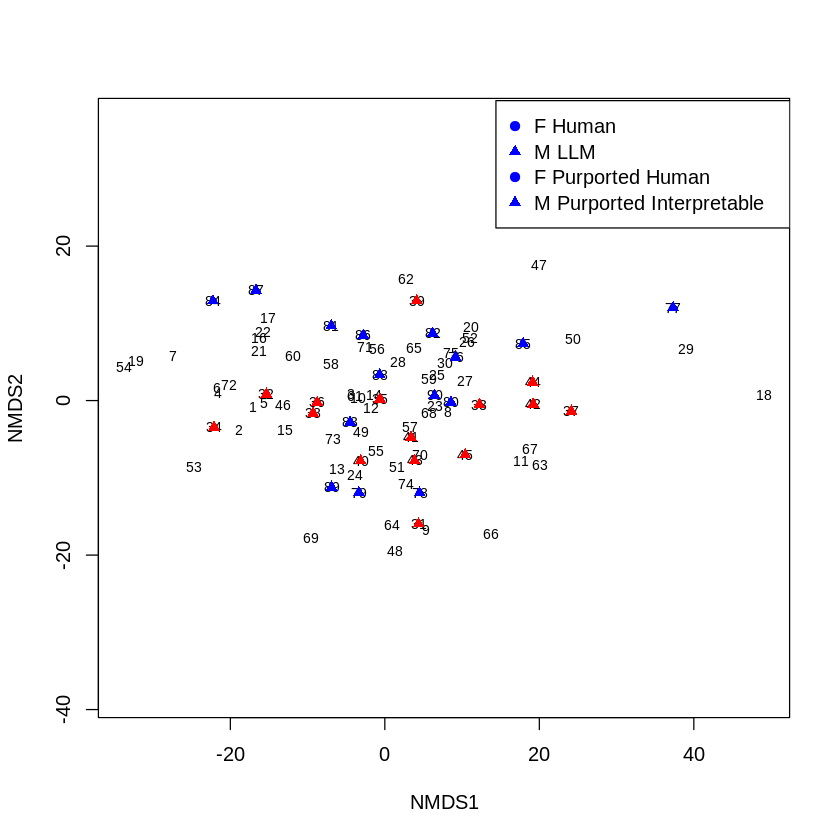

In [ ]:
# 安装并加载必要的R包
if (!require("dplyr")) install.packages("dplyr")
if (!require("vegan")) install.packages("vegan")
library(dplyr)
library(vegan)

# 假设已经将数据读入到R中的数据框名为df
# df <- read.csv("your_data.csv")

# 筛选出 Model_type 不为 Human 的数据
non_human_data <- df %>% filter(Model_type != "Human")

# 提取响应变量
response_data_non_human <- non_human_data[, c("Cooperate", "Betrayal", "Earns", "Switchs", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")]

# 打印响应变量数据
print("响应变量数据：")
print(head(response_data_non_human))

# 提取分组因子
grouping_factors_non_human <- non_human_data[, c("Sex", "Model_type")]

# 打印分组因子数据
print("分组因子数据：")
print(head(grouping_factors_non_human))

# 计算距离矩阵
distance_matrix_non_human <- vegdist(response_data_non_human, method = "euclidean")

# 打印距离矩阵
print("距离矩阵：")
print(as.matrix(distance_matrix_non_human)[1:5, 1:5]) # 打印前5行和5列

# 进行PERMANOVA分析
permanova_result_non_human <- adonis2(distance_matrix_non_human ~ Sex + Model_type, data = grouping_factors_non_human)

# 打印PERMANOVA结果
print("PERMANOVA分析结果：")
print(permanova_result_non_human)

# 进行MDS分析
mds_result_non_human <- metaMDS(distance_matrix_non_human)

# 打印MDS分析结果
print("MDS分析结果：")
print(mds_result_non_human)

# 可视化MDS结果
plot(mds_result_non_human, type = "t")

# 使用不同的颜色和形状来表示不同的 Sex 和 Model_type
sex_types <- as.factor(non_human_data$Sex)
model_types <- as.factor(non_human_data$Model_type)
colors <- c("blue", "red")
shapes <- c(19, 17)

# 绘制点
for (i in 1:length(levels(sex_types))) {
  for (j in 1:length(levels(model_types))) {
    indices <- which(sex_types == levels(sex_types)[i] & model_types == levels(model_types)[j])
    points(mds_result_non_human$points[indices, ], col = colors[i], pch = shapes[j])
  }
}

# 添加图例
legend("topright", legend = paste(levels(sex_types), levels(model_types)), col = rep(colors, each = length(levels(model_types))), pch = rep(shapes, times = length(levels(sex_types))))


    2.检查数据的呈现结果是否正态分布，是为了确定后面的统计方法的选择

In [ ]:

# 加载必要的包
library(stats)

# 假设 df 是你的数据框
# numeric_columns <- sapply(df, is.numeric)

# 你想跳过检查的列名
exclude_columns <- c("Time")

# 筛选出需要进行Shapiro-Wilk检验的列名
columns_to_check <- setdiff(names(df)[sapply(df, is.numeric)], exclude_columns)

# 对每个数值列进行Shapiro-Wilk检验，并打印是否符合正态分布
for (column in columns_to_check) {
  test_result <- shapiro.test(df[[column]])
  cat('Shapiro-Wilk test for', column, ':\n')
  cat('Statistic=', test_result$statistic, ', p-value=', test_result$p.value, '\n')

  if (test_result$p.value > 0.05) {
    cat('Result: 正态分布\n\n')
  } else {
    cat('Result: 非正态分布\n\n')
  }
}


Shapiro-Wilk test for Age :
Statistic= 0.9000049 , p-value= 1.963474e-07 
Result: 非正态分布

Shapiro-Wilk test for Cooperate :
Statistic= 0.9762576 , p-value= 0.03207964 
Result: 非正态分布

Shapiro-Wilk test for Betrayal :
Statistic= 0.9761359 , p-value= 0.03126407 
Result: 非正态分布

Shapiro-Wilk test for Earns :
Statistic= 0.9840708 , p-value= 0.1693067 
Result: 正态分布

Shapiro-Wilk test for Switchs :
Statistic= 0.9844407 , p-value= 0.1829276 
Result: 正态分布

Shapiro-Wilk test for Be_Friendly :
Statistic= 0.9536519 , p-value= 0.000404462 
Result: 非正态分布

Shapiro-Wilk test for Repair_Effort :
Statistic= 0.9169492 , p-value= 1.608219e-06 
Result: 非正态分布

Shapiro-Wilk test for Be_Friendly_Weighted :
Statistic= 0.970273 , p-value= 0.009268753 
Result: 非正态分布

Shapiro-Wilk test for Repair_Effort_Weighted :
Statistic= 0.9295779 , p-value= 9.057254e-06 
Result: 非正态分布



    3.PERMANOVA 性别主效应（M vs F）对几个因变量的综合影响是否显著？

    1. Df：自由度（Degrees of Freedom）
    2. SumOfSqs：平方和（Sum of Squares）
    3. R2：决定系数（R-squared），表示各个因子对总变异的解释比例
    4. F值
    5. Pr(>F)：p值，表示在置换检验中的统计显著性


In [ ]:
# 设置随机种子
set.seed(100)  # 1234是一个任意选定的种子，你可以选择任何整数

# 提取自变量
variables <- df[, c('Cooperate', 'Switchs', 'Be_Friendly', 'Repair_Effort', 'Be_Friendly_Weighted', 'Repair_Effort_Weighted')]

# 计算距离矩阵
dist_matrix <- vegdist(variables, method = 'euclidean')

# 进行PERMANOVA分析
result <- adonis2(dist_matrix ~ Sex, data = df, permutations = 999)

# 打印结果
print(result)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = dist_matrix ~ Sex, data = df, permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)
Sex        1     57.8 0.00401 0.4749   0.57
Residual 118  14354.4 0.99599              
Total    119  14412.1 1.00000              


    4.PERMANOVA 主效应Model_type（PH vs PI vs LLM vs H）对几个因变量的综合影响是否显著？

In [ ]:
# 设置随机种子
set.seed(100)  # 1234是一个任意选定的种子，你可以选择任何整数

# 提取自变量
variables <- df[, c('Cooperate', 'Switchs', 'Be_Friendly', 'Repair_Effort', 'Be_Friendly_Weighted', 'Repair_Effort_Weighted')]

# 计算距离矩阵
dist_matrix <- vegdist(variables, method = 'euclidean')

# 进行PERMANOVA分析
result <- adonis2(dist_matrix ~ Model_type, data = df, permutations = 999)

# 打印结果
print(result)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = dist_matrix ~ Model_type, data = df, permutations = 999)
            Df SumOfSqs      R2      F Pr(>F)    
Model_type   3   3164.6 0.21958 10.879  0.001 ***
Residual   116  11247.6 0.78042                  
Total      119  14412.1 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


    5.PERMANOVA 交互效应






In [ ]:
# 设置随机数种子，以保证结果可重复
set.seed(100)

# 从数据框 df 中选择特定的列，构建数据矩阵
data_matrix <- df[, c("Cooperate", "Switchs", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")]

# 基于欧氏距离计算距离矩阵
dist_matrix <- vegdist(data_matrix, method = "euclidean")

# 进行 PERMANOVA 分析，探讨 Sex 和 Model_type 以及它们的交互作用对距离矩阵的影响
result <- adonis2(dist_matrix ~ Sex * Model_type, data = df, permutations = 999)

# 输出 PERMANOVA 结果
print(result)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = dist_matrix ~ Sex * Model_type, data = df, permutations = 999)
                Df SumOfSqs      R2       F Pr(>F)    
Sex              1     57.8 0.00401  0.6025  0.492    
Model_type       3   3164.6 0.21958 11.0010  0.001 ***
Sex:Model_type   3    450.4 0.03125  1.5658  0.172    
Residual       112  10739.4 0.74516                   
Total          119  14412.1 1.00000                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


    6. 接下来要进行单一性别在不同Model_type时是否有显著差异。

    6.1 男 PERMANOVA 一个自变量（model_type）和多个响应变量

In [ ]:
# 筛选性别为 "M" 的数据
df_male <- subset(df, Sex == "M")

# 提取因变量矩阵
response_matrix <- as.matrix(df_male[, c("Cooperate", "Switchs", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")])

# 计算距离矩阵
distance_matrix <- vegdist(response_matrix, method = "euclidean")

# 进行 PERMANOVA 测试
permanova_results <- adonis2(distance_matrix ~ df_male$Model_type, permutations = 999)

# 查看结果
print(permanova_results)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = distance_matrix ~ df_male$Model_type, permutations = 999)
                   Df SumOfSqs      R2      F Pr(>F)    
df_male$Model_type  3   1909.0 0.28528 7.4507  0.001 ***
Residual           56   4782.7 0.71472                  
Total              59   6691.7 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


    6.2 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较Coopertate时的显著差异, 关联样本，一个自变量，一个响应变量


In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "M")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    cooperate1 <- data_model_types[[type1]]$Cooperate
    cooperate2 <- data_model_types[[type2]]$Cooperate

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(cooperate1, cooperate2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 107.5 
P-value: 0.007574 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 104 
P-value: 0.01343 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 109.5 
P-value: 0.00533 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 25 
P-value: 0.04946 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 97.5 
P-value: 0.03501 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 104 
P-value: 0.001348 
-----------------------------------


    6.3 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较Befriednly时的显著差异, 关联样本，一个自变量，一个响应变量


In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "M")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    be_friendly1 <- data_model_types[[type1]]$Be_Friendly
    be_friendly2 <- data_model_types[[type2]]$Be_Friendly

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(be_friendly1, be_friendly2, paired = TRUE, exact = TRUE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Warning message in wilcox.test.default(be_friendly1, be_friendly2, paired = TRUE, :
“cannot compute exact p-value with zeroes”


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 47 
P-value: 0.4887 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 32 
P-value: 0.1205 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 47 
P-value: 0.7536 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 35 
P-value: 0.1688 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 79 
P-value: 0.3028 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 95 
P-value: 0.04791 
-----------------------------------


    6.4 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较Repair_Effort时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "M")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    repair_effort1 <- data_model_types[[type1]]$Repair_Effort
    repair_effort2 <- data_model_types[[type2]]$Repair_Effort

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(repair_effort1, repair_effort2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 53 
P-value: 0.712 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 24 
P-value: 0.07879 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 35 
P-value: 0.2859 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 16 
P-value: 0.01347 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 37 
P-value: 0.3464 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 89 
P-value: 0.1055 
-----------------------------------


    6.5 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较befiriendly_weighted时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "M")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
     be_friendly_weight1 <- data_model_types[[type1]]$Be_Friendly_Weighted
     be_friendly_weight2 <- data_model_types[[type2]]$Be_Friendly_Weighted

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(be_friendly_weight1, be_friendly_weight2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}

Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 47 
P-value: 0.4777 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 24 
P-value: 0.04377 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 38 
P-value: 0.3795 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 18 
P-value: 0.01842 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 65 
P-value: 0.7983 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 97 
P-value: 0.03817 
-----------------------------------


    6.5 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较repair_effort_weighted时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "M")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    repair_effort_weight1 <- data_model_types[[type1]]$Repair_Effort_Weighted
    repair_effort_weight2 <- data_model_types[[type2]]$Repair_Effort_Weighted

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(repair_effort_weight1, repair_effort_weight2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 60 
P-value: 1 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 43 
P-value: 0.3487 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 49 
P-value: 0.8506 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 26 
P-value: 0.05708 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 52 
P-value: 0.6701 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 96 
P-value: 0.04377 
-----------------------------------


    7.1 女 PERMANOVA 一个自变量（model_type）和多个响应变量

In [ ]:
# 筛选性别为 "F" 的数据
df_male <- subset(df, Sex == "F")

# 提取因变量矩阵
response_matrix <- as.matrix(df_male[, c("Cooperate", "Switchs", "Be_Friendly", "Repair_Effort", "Be_Friendly_Weighted", "Repair_Effort_Weighted")])

# 计算距离矩阵
distance_matrix <- vegdist(response_matrix, method = "euclidean")

# 进行 PERMANOVA 测试
permanova_results <- adonis2(distance_matrix ~ df_male$Model_type, permutations = 999)

# 查看结果
print(permanova_results)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = distance_matrix ~ df_male$Model_type, permutations = 999)
                   Df SumOfSqs      R2      F Pr(>F)    
df_male$Model_type  3   1706.0 0.22264 5.3462  0.001 ***
Residual           56   5956.7 0.77736                  
Total              59   7662.7 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


    7.2 男 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较cooperate时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "F")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    cooperate1 <- data_model_types[[type1]]$Cooperate
    cooperate2 <- data_model_types[[type2]]$Cooperate

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(cooperate1, cooperate2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 105 
P-value: 0.001091 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 117 
P-value: 0.00132 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 103 
P-value: 0.01574 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 34 
P-value: 0.147 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 25.5 
P-value: 0.05314 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 37.5 
P-value: 0.3611 
-----------------------------------


    7.3 女 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较be_friendly时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "F")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    be_friendly1 <- data_model_types[[type1]]$Be_Friendly
    be_friendly2 <- data_model_types[[type2]]$Be_Friendly

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(be_friendly1, be_friendly2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Warning message in wilcox.test.default(be_friendly1, be_friendly2, paired = TRUE, :
“cannot compute exact p-value with zeroes”
Warning message in wilcox.test.default(be_friendly1, be_friendly2, paired = TRUE, :
“cannot compute exact p-value with zeroes”


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 49 
P-value: 0.8506 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 51 
P-value: 0.6387 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 24 
P-value: 0.04126 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 34 
P-value: 0.1514 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 20 
P-value: 0.04455 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 40 
P-value: 0.2769 
-----------------------------------


    7.4 女 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较时repair_effort的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "F")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    repair_effort1 <- data_model_types[[type1]]$Repair_Effort
    repair_effort2 <- data_model_types[[type2]]$Repair_Effort

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(repair_effort1, repair_effort2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}

Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 37 
P-value: 0.3464 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 35 
P-value: 0.1641 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 34 
P-value: 0.2584 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 44 
P-value: 0.3786 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 63 
P-value: 0.8871 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 79 
P-value: 0.2934 
-----------------------------------


    7.5 女 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较befiriendly_weighted时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "F")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
     be_friendly_weight1 <- data_model_types[[type1]]$Be_Friendly_Weighted
     be_friendly_weight2 <- data_model_types[[type2]]$Be_Friendly_Weighted

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(be_friendly_weight1, be_friendly_weight2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}

Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 42 
P-value: 0.5302 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 43 
P-value: 0.3487 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 23 
P-value: 0.03817 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 45 
P-value: 0.4102 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 16 
P-value: 0.02382 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 28 
P-value: 0.0736 
-----------------------------------


    7.6 女 Wilcoxon Signed Rank Test 组中的不同Model_type两两比较repair_effort_weighted时的显著差异, 关联样本，一个自变量，一个响应变量

In [ ]:
library(dplyr)

# 过滤出性别为M的数据
data_male <- df %>% filter(Sex == "F")

# 确保 Model_type 列是因子类型（如果不是的话）
data_male$Model_type <- as.factor(data_male$Model_type)

# 按照 model_type 对数据进行分类
data_model_types <- split(data_male, data_male$Model_type)

# 获取所有的 model_type
model_types <- names(data_model_types)

# 创建一个空列表来存储结果
results <- list()

# 两两比较
for (i in 1:(length(model_types) - 1)) {
  for (j in (i + 1):length(model_types)) {
    type1 <- model_types[i]
    type2 <- model_types[j]

    # 提取对应的 Cooperate 数据
    repair_effort_weight1 <- data_model_types[[type1]]$Repair_Effort_Weighted
    repair_effort_weight2 <- data_model_types[[type2]]$Repair_Effort_Weighted

    # 进行 Wilcoxon Signed-Rank Test，使用近似 p 值
    test_result <- wilcox.test(repair_effort_weight1, repair_effort_weight2, paired = TRUE, exact = FALSE)

    # 将结果存储在列表中
    results[[paste(type1, "vs", type2)]] <- test_result
  }
}

# 打印结果的简洁格式，以便更容易解释
cat("Wilcoxon Signed-Rank Test Results:\n")
cat("-----------------------------------\n")
for (comparison in names(results)) {
  test_result <- results[[comparison]]
  cat("\nComparison:", comparison,
      "\nW statistic:", test_result$statistic,
      "\nP-value:", format.pval(test_result$p.value, digits = 4), "\n")
  cat("-----------------------------------\n")
}


Wilcoxon Signed-Rank Test Results:
-----------------------------------

Comparison: Human vs LLM 
W statistic: 34 
P-value: 0.2585 
-----------------------------------

Comparison: Human vs Purported Human 
W statistic: 33 
P-value: 0.1323 
-----------------------------------

Comparison: Human vs Purported Interpretable 
W statistic: 32 
P-value: 0.1183 
-----------------------------------

Comparison: LLM vs Purported Human 
W statistic: 59 
P-value: 0.9773 
-----------------------------------

Comparison: LLM vs Purported Interpretable 
W statistic: 53 
P-value: 0.712 
-----------------------------------

Comparison: Purported Human vs Purported Interpretable 
W statistic: 52 
P-value: 0.6701 
-----------------------------------



	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 154.5, p-value = 0.08394
alternative hypothesis: true location shift is not equal to 0

无显著差异: 无法拒绝原假设，A 和 B 之间不存在显著差异


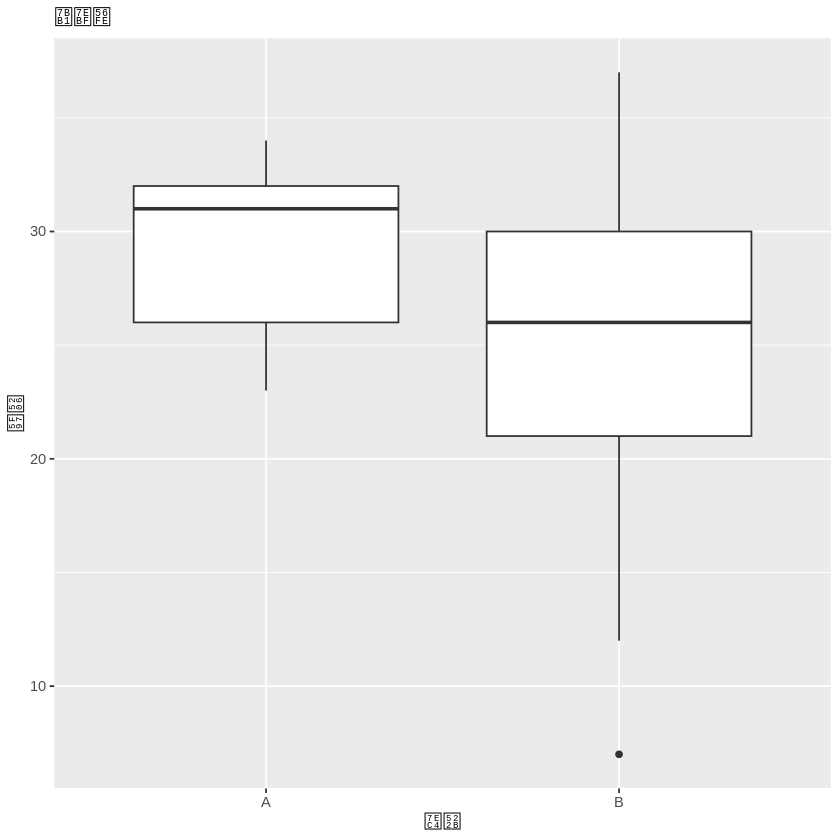

In [ ]:
# 加载必要的库
library(ggplot2)

# 创建数据向量
A <- c(30, 34, 26, 32, 31, 32, 31, 23, 34, 26, 24, 26, 32, 25, 32)
B <- c(30, 7, 37, 29, 12, 30, 16, 31, 34, 29, 21, 26, 24, 21, 25)

# 绘制箱线图
data <- data.frame(
  score = c(A, B),
  group = factor(rep(c("A", "B"), each = length(A)))
)

ggplot(data, aes(x = group, y = score)) +
  geom_boxplot() +
  labs(title = "箱线图", x = "组别", y = "得分")

# 执行 Mann-Whitney U 检验，启用连续性修正
mw_test <- wilcox.test(A, B, alternative = "two.sided", exact = FALSE, correct = TRUE)

# 打印检验结果
print(mw_test)

# 结果解释
alpha <- 0.05
if (mw_test$p.value < alpha) {
  cat("显著差异: 拒绝原假设，A 和 B 之间存在显著差异\n")
} else {
  cat("无显著差异: 无法拒绝原假设，A 和 B 之间不存在显著差异\n")
}

In [ ]:
library(dplyr)

# 筛选出 model_type 为 "Purported Human" 的数据
df_filtered <- df %>% filter(Model_type == "Purported Human")

# 使用 Mann-Whitney U 检验比较 Cooperate 的显著性差异
test_result <- wilcox.test(Cooperate ~ Sex, data = df_filtered, exact = FALSE,correct = TRUE)

# 打印结果
print(test_result)


	Wilcoxon rank sum test with continuity correction

data:  Cooperate by Sex
W = 70.5, p-value = 0.08394
alternative hypothesis: true location shift is not equal to 0



In [ ]:
library(dplyr)

# 筛选出 model_type 为 "Purported In" 的数据
df_filtered <- df %>% filter(Model_type == "Purported Interpretable")

# 使用 Mann-Whitney U 检验比较 Cooperate 的显著性差异
test_result <- wilcox.test(Cooperate ~ Sex, data = df_filtered, exact = TRUE)

# 打印结果
print(test_result)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Cooperate by Sex
W = 155.5, p-value = 0.0773
alternative hypothesis: true location shift is not equal to 0

